In [104]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [105]:
import numpy as np
import math
import pandas
import itertools
import random

In [106]:
data=np.array([[-1, -1 ,1, -1, 1, -1, -1, 1],[-1 ,-1, -1, -1, -1, 1, -1, -1],[-1, 1, 1, -1, -1, 1, -1, 1]])
data

array([[-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1]])

In [107]:
def hebbiantraining(data):   #function that trains an hopfield network given a data matrix
    N=len(data[0])
    P=len(data[:,0])
    W=np.zeros((N,N))
    for k in range(P):
        for i in range(N):
            for j in range(N):
                W[i,j]+=data[k,i]*data[k,j]
    
    return W/N
W=hebbiantraining(data)
print(W)

[[ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [ 0.125  0.375  0.125  0.125 -0.125  0.125  0.125  0.125]
 [-0.125  0.125  0.375 -0.125  0.125 -0.125 -0.125  0.375]
 [ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [ 0.125 -0.125  0.125  0.125  0.375 -0.375  0.125  0.125]
 [-0.125  0.125 -0.125 -0.125 -0.375  0.375 -0.125 -0.125]
 [ 0.375  0.125 -0.125  0.375  0.125 -0.125  0.375 -0.125]
 [-0.125  0.125  0.375 -0.125  0.125 -0.125 -0.125  0.375]]


In [108]:
def recall (x,W,max_iterations=1000):        # function that recalls a pattern given a new vector
    yold=np.random.rand(x.size)
    ynew=x.copy()
    count=0
    while(not np.array_equal(ynew,yold) and count <max_iterations):  #iterazione fino a convergenza o fino a 1000 se non dovesse convergere
        yold=ynew.copy()
        ynew=np.sign(W @ yold.T)
        count+=1
       

    return ynew

print(recall(data[0],W))
print(recall(data[1],W))
print(recall(data[2],W))


[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]


In [109]:
# Task 1
datadist=np.array([[ 1 ,-1, 1, -1, 1, -1, -1, 1],[ 1, 1, -1, -1, -1, 1, -1, -1],[ 1, 1, 1, -1, 1, 1, -1, 1]])
print(datadist)
print(recall(datadist[0],W))
print(recall(datadist[1],W))
print(recall(datadist[2],W))
print(data)

[[ 1 -1  1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1 -1  1]]
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]
[[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]


In [110]:
combinazioni=list(itertools.product([-1,1],repeat=8))  #tutte le possibili combinazioni di -1 e 1
attractors=[]
for x in combinazioni:
    x=np.array(x)
    if np.array_equal(recall(x,W),x):     # x è un attrattore se è un punto fisso della funzione recall
        attractors.append(x)
attractors=np.array(attractors)
print(len(attractors))      # 64 attrattori

10


In [111]:
x2dist=np.array([1,1,1,1,1,1,-1,-1])# i primi 5 numeri sono sbagliati
print(recall(x2dist,W))   #finisce in un altro attrattore, diverso da quelli usati in training

[ 1.  1. -1.  1.  1. -1.  1. -1.]


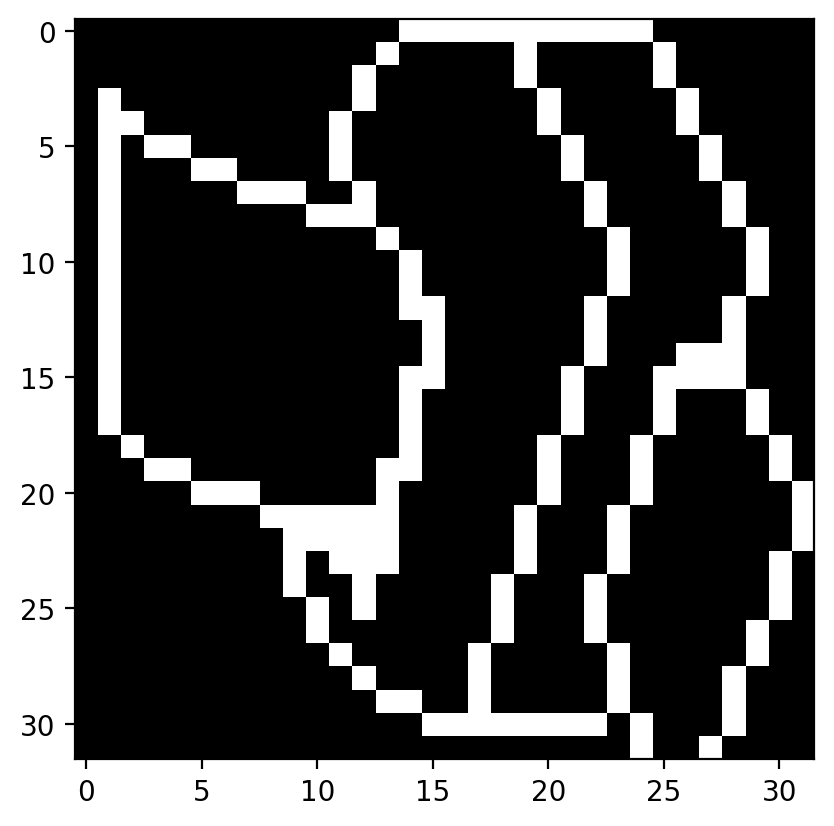

In [112]:
#Task 2
p=np.loadtxt('pict.dat', delimiter=',')
p=p.reshape(11,1024)
p1=p[0]
p2=p[1]
p3=p[2]
p4=p[3]
p5=p[4]
p6=p[5]
p7=p[6]
p8=p[7]
p9=p[8]
p10=p[9]
p11=p[10]
plt.rcParams['text.usetex'] = False
def showpicture(p):
    p_image=p.reshape(32,32)
    plt.imshow(p_image,cmap='gray',vmin=-1,vmax=1)
    plt.show()
showpicture(p1)

In [113]:
training_data=np.array([p1,p2,p3])
W= hebbiantraining(training_data)


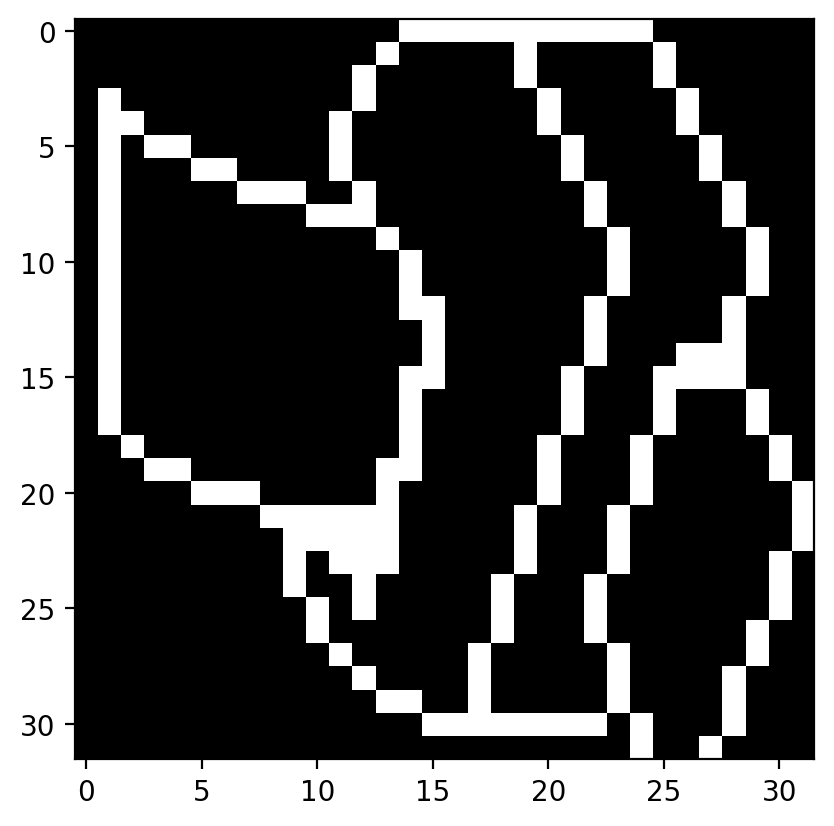

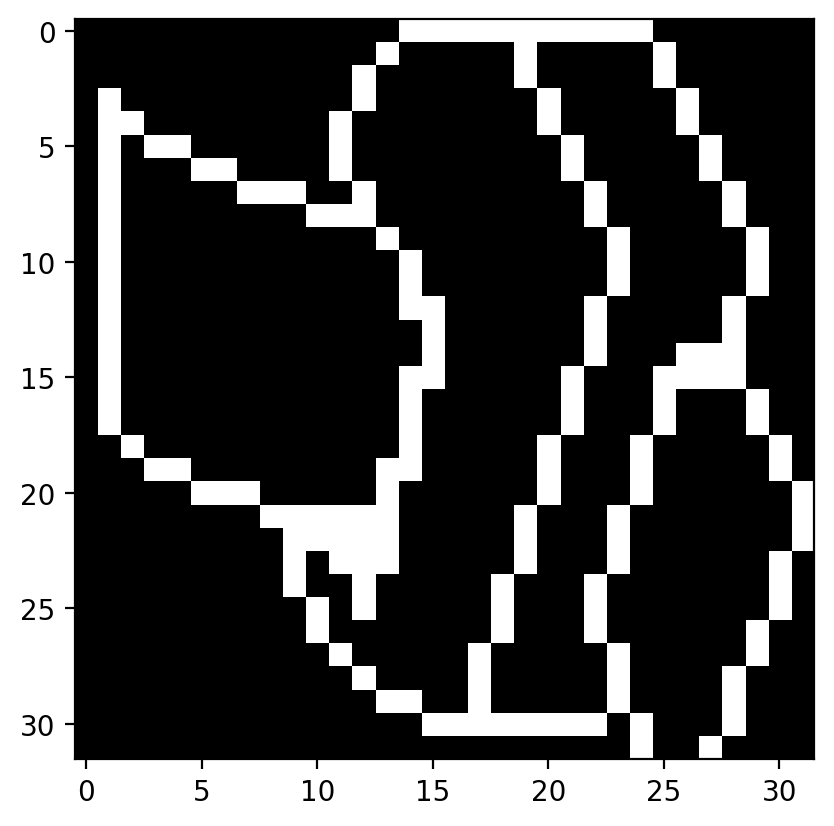

In [114]:
showpicture(p1)
showpicture(recall(p1,W)) #recovered pattern

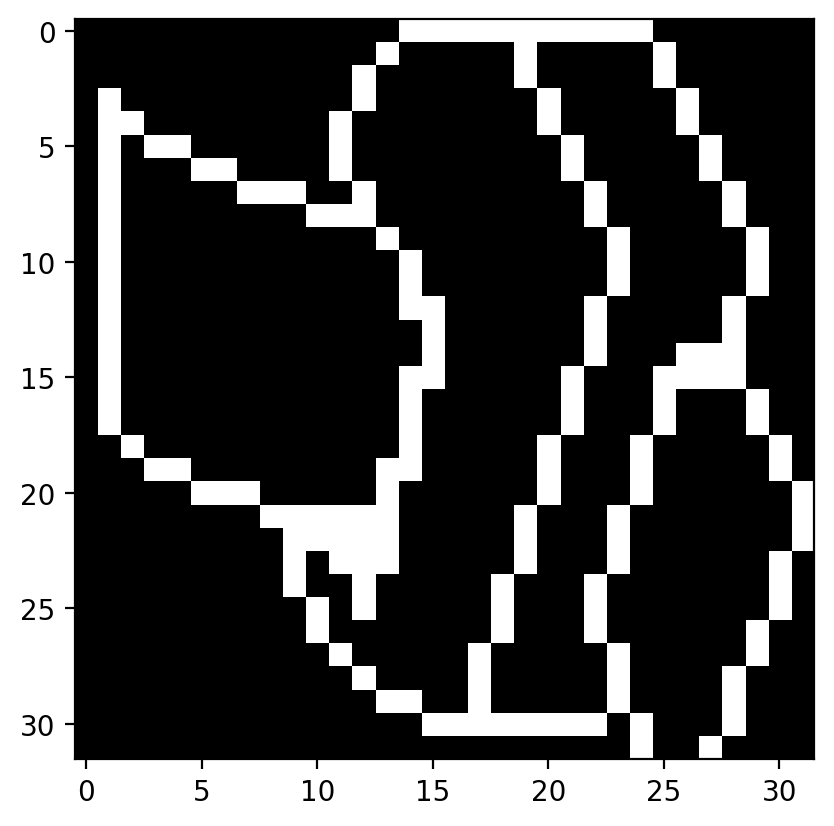

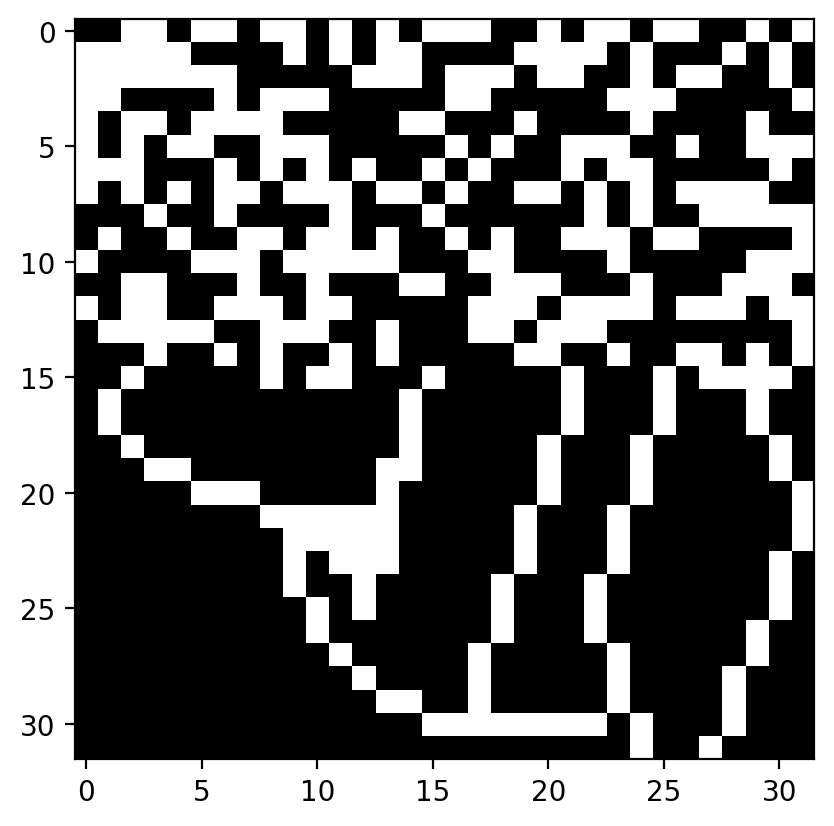

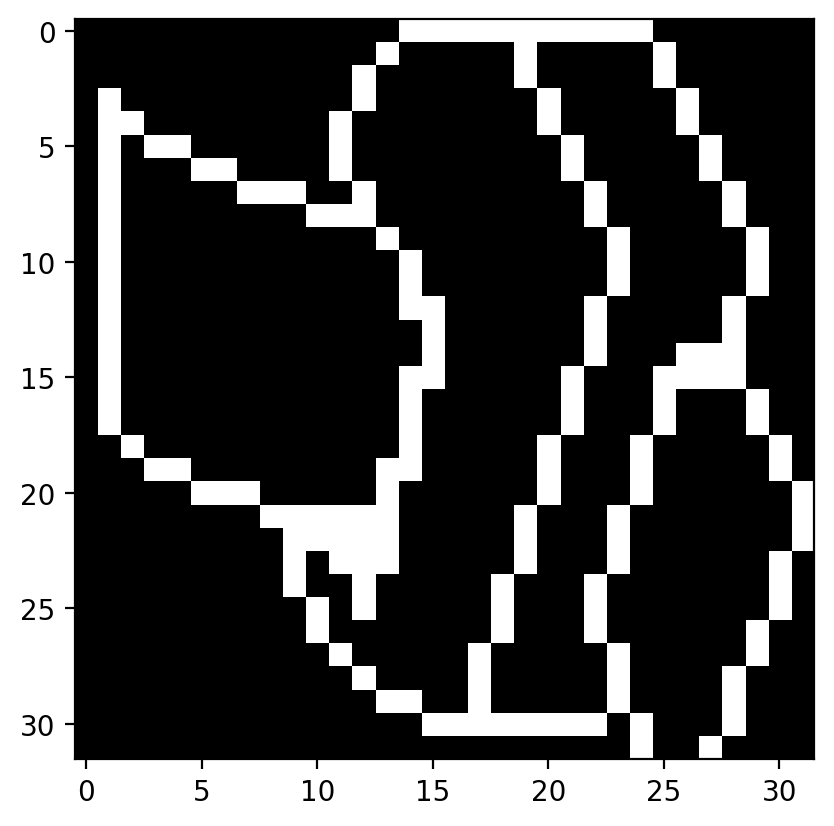

In [115]:
showpicture(p1)
showpicture(p10)
showpicture(recall(p10,W)) #pattern recovered

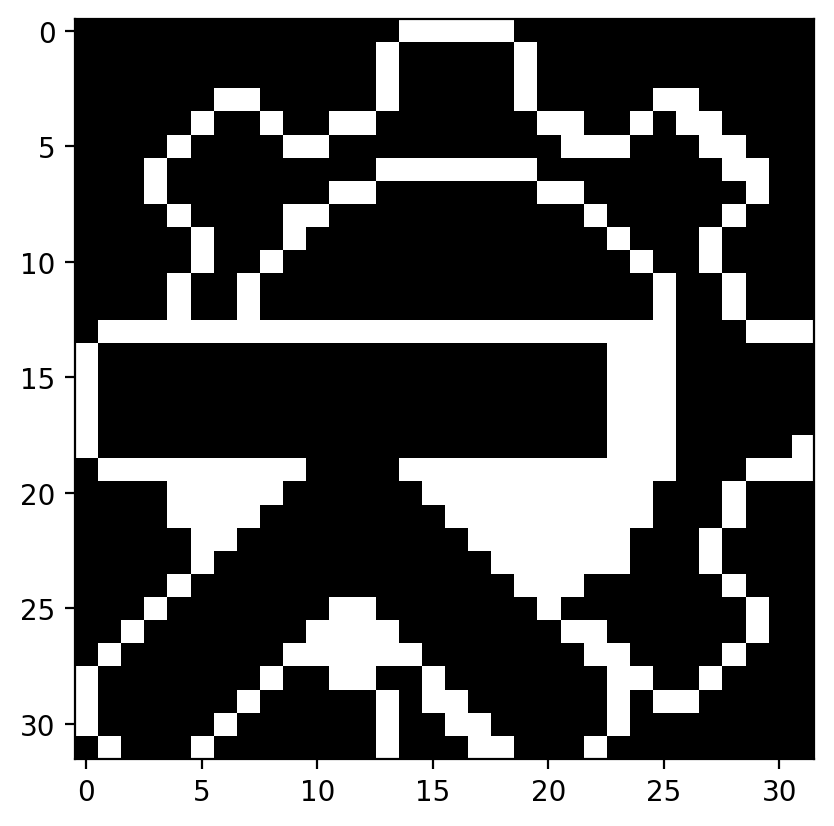

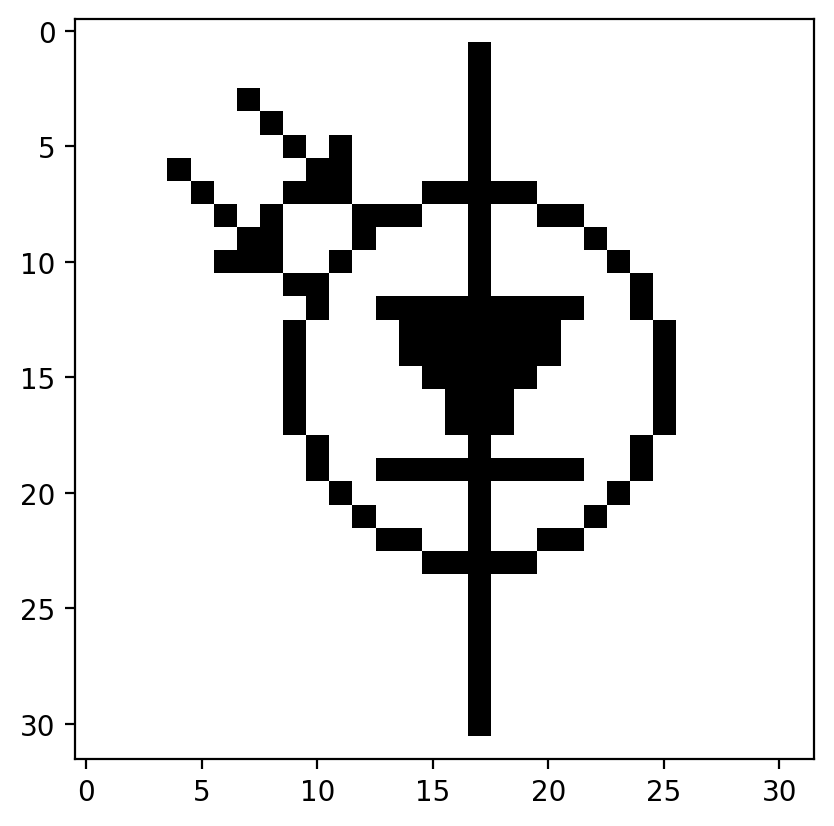

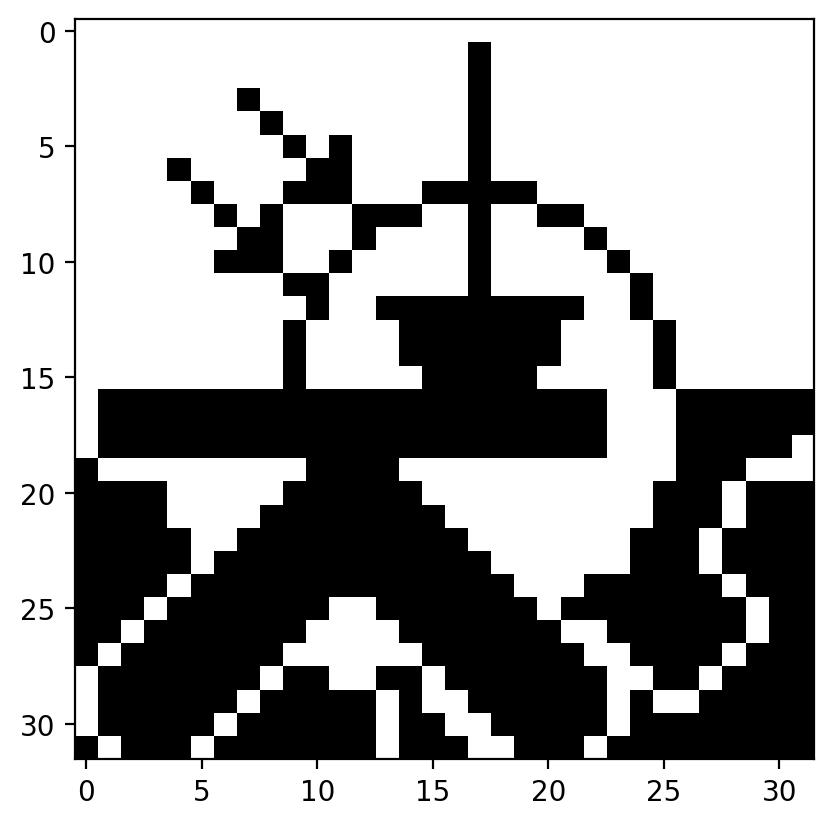

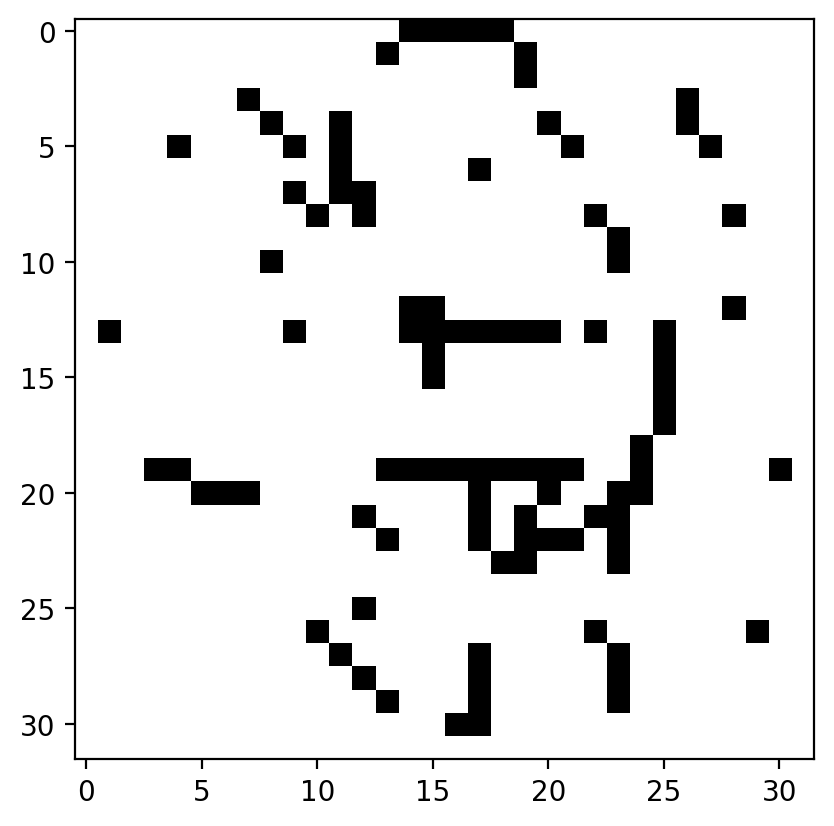

In [116]:
showpicture(p2)
showpicture(p3)
showpicture(p11)
showpicture(recall(p11,W)) #pattern NOT recovered

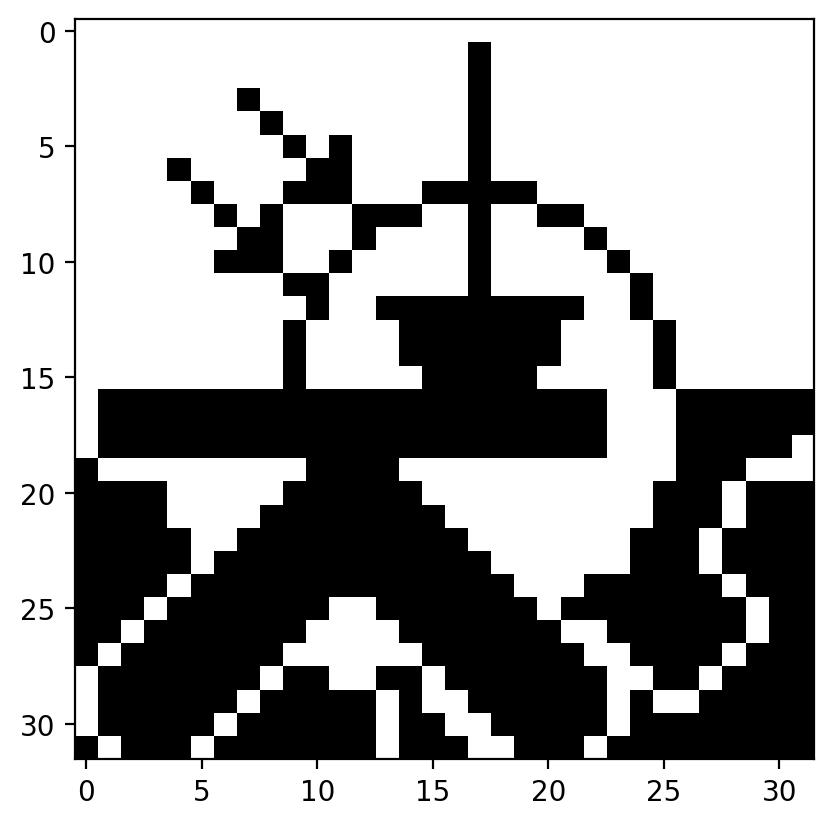

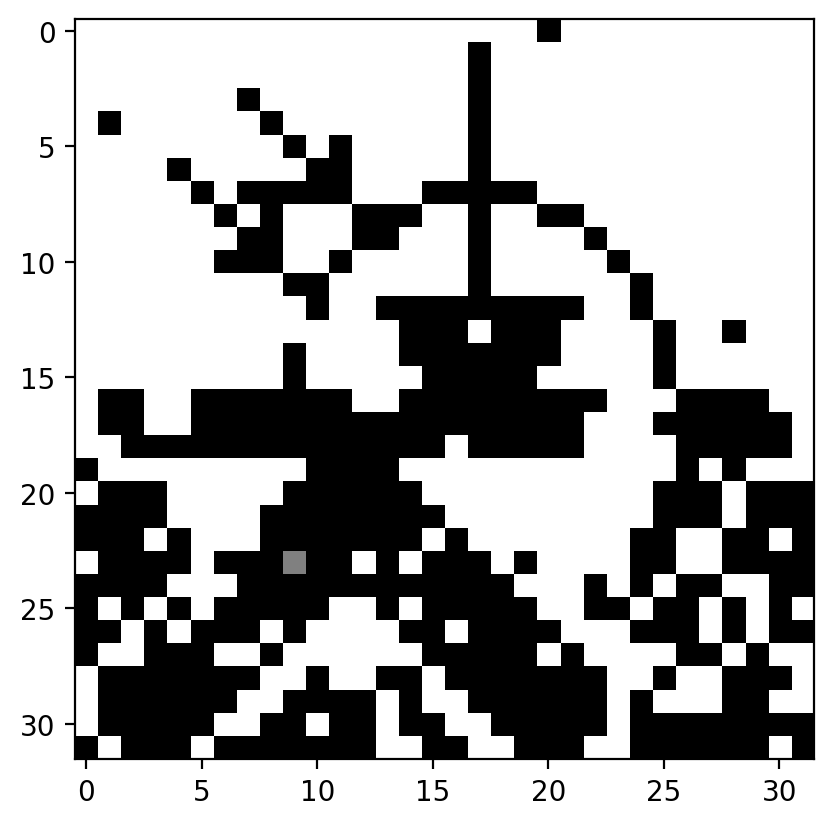

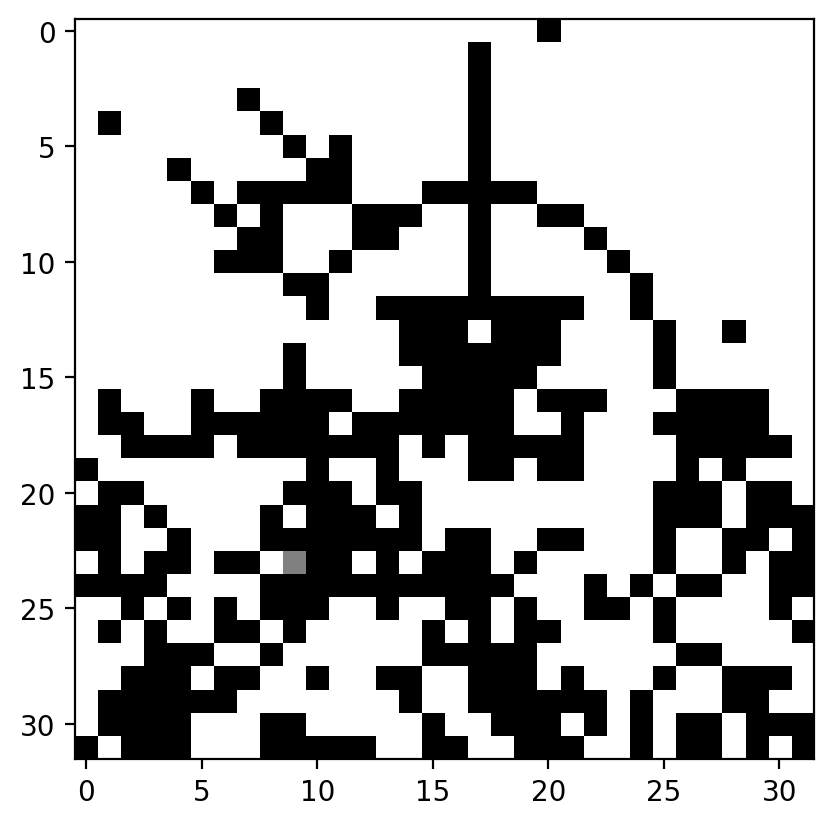

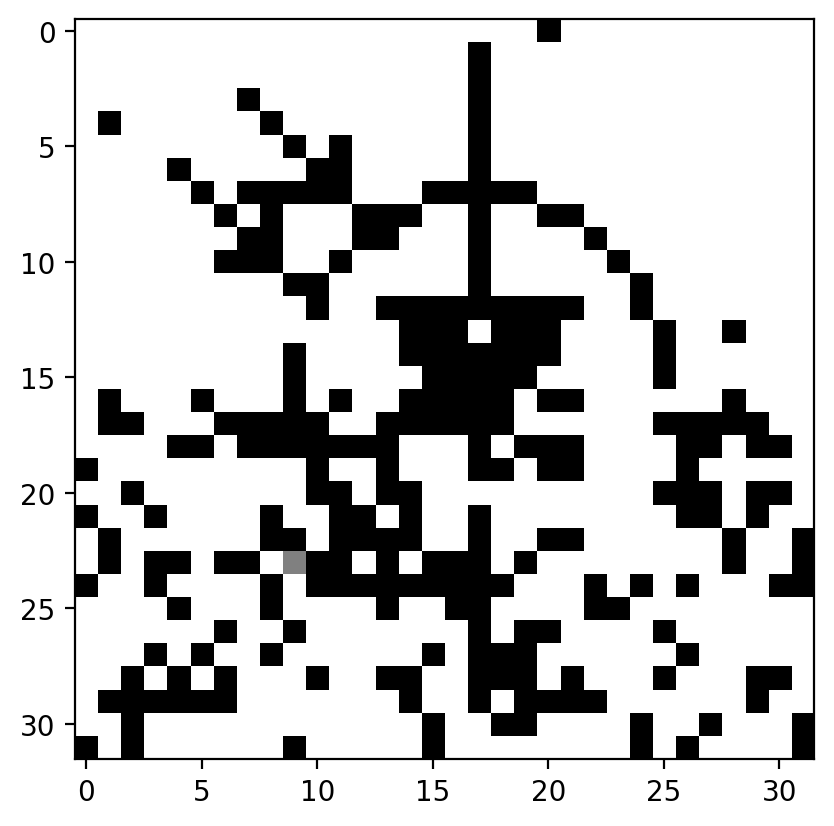

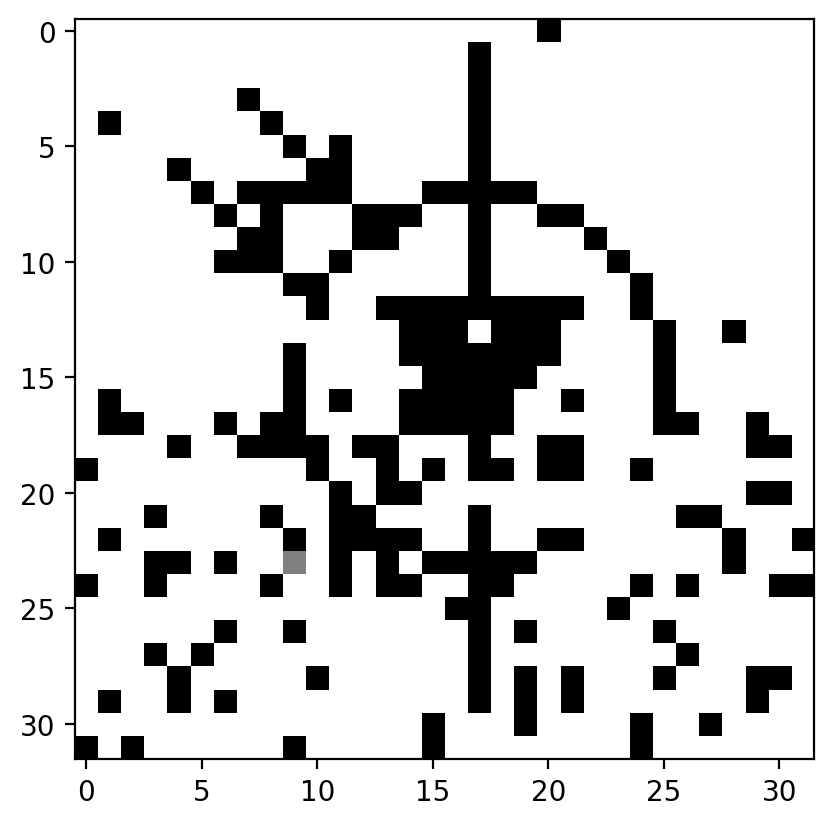

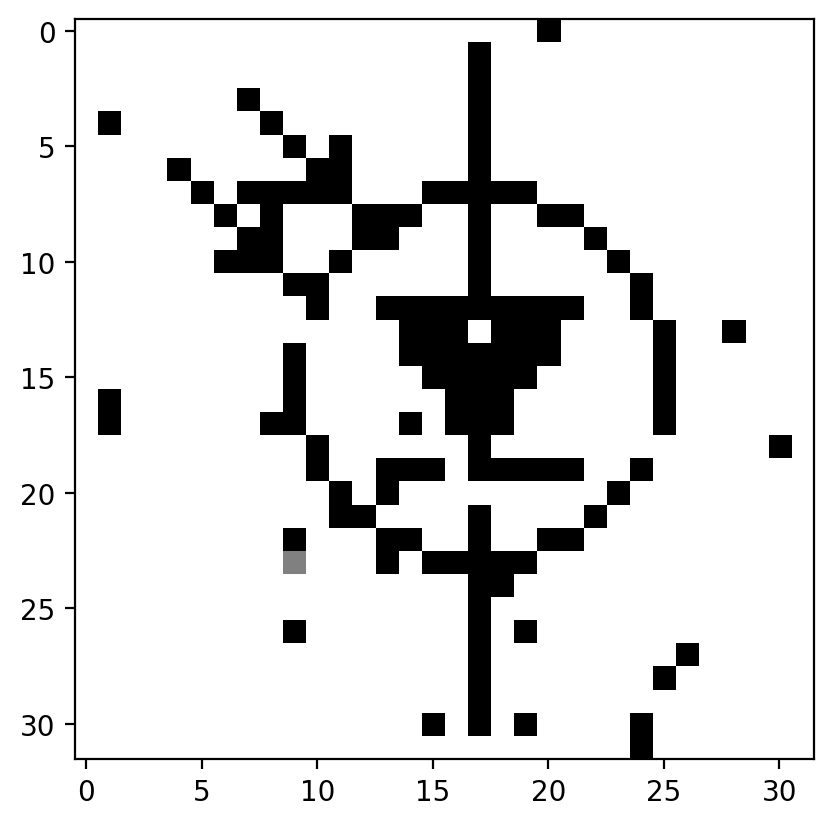

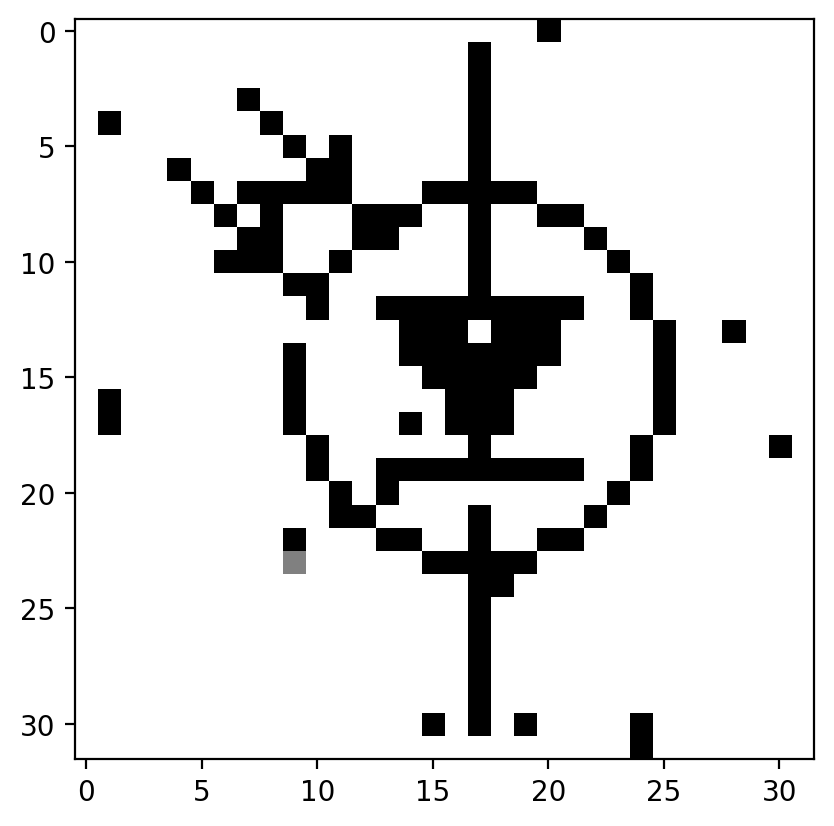

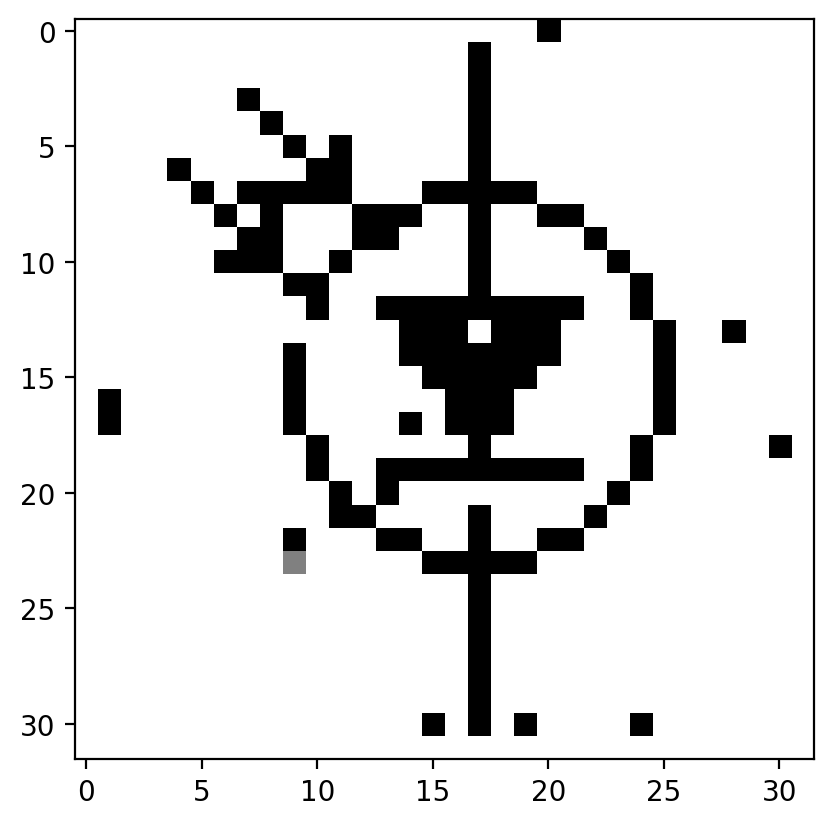

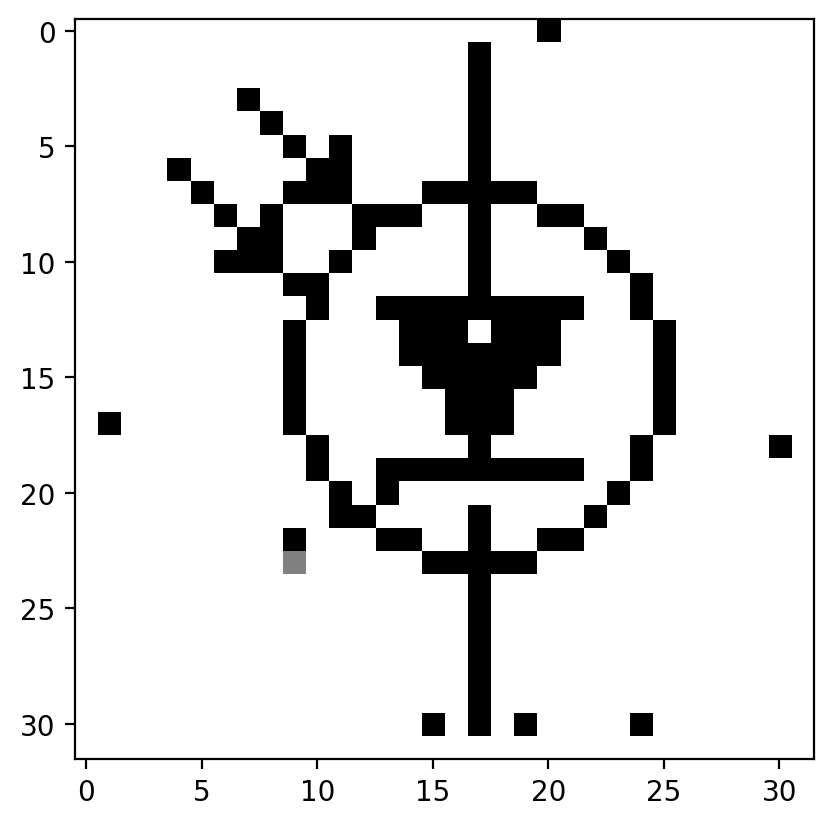

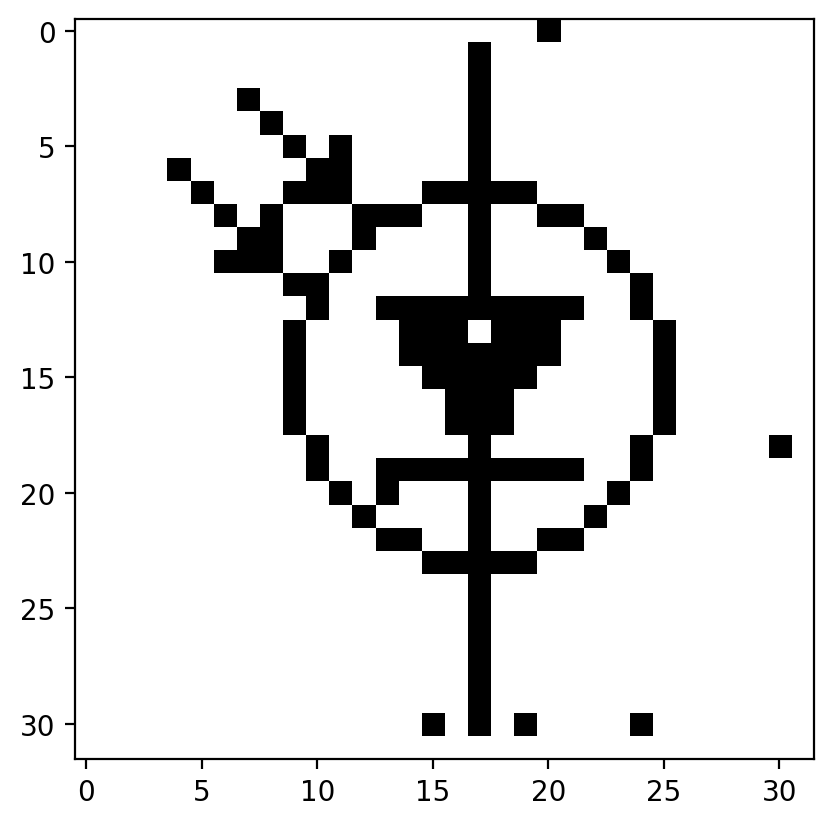

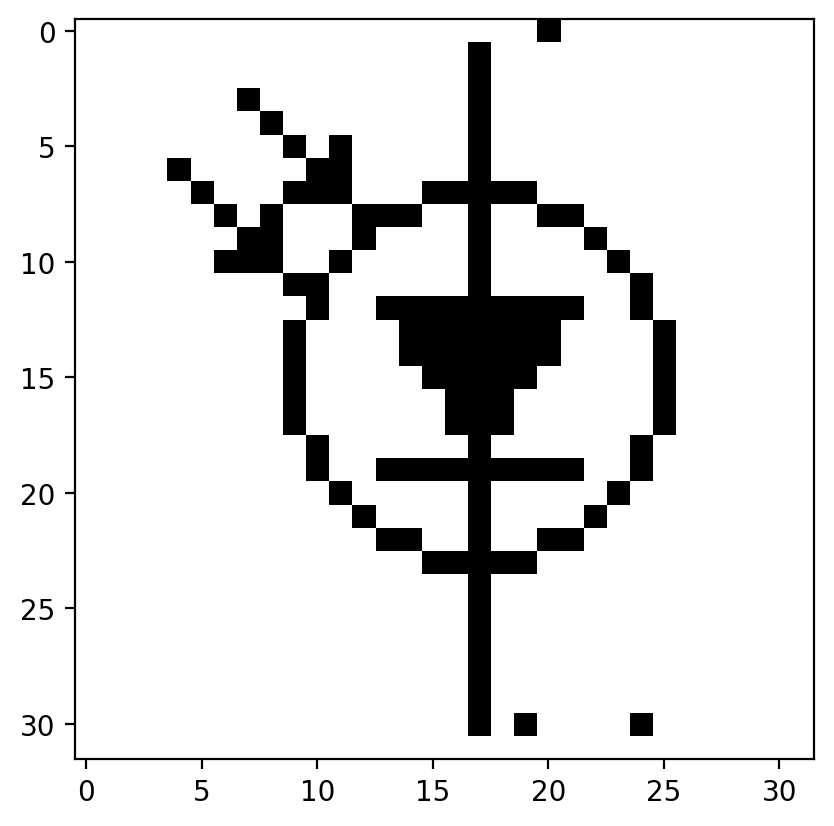

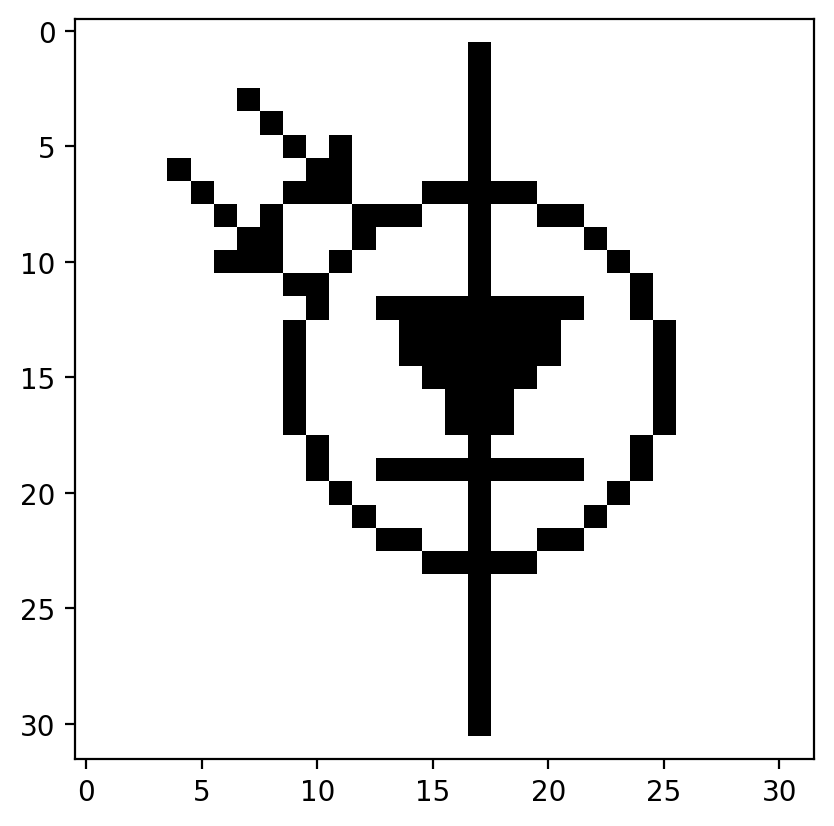

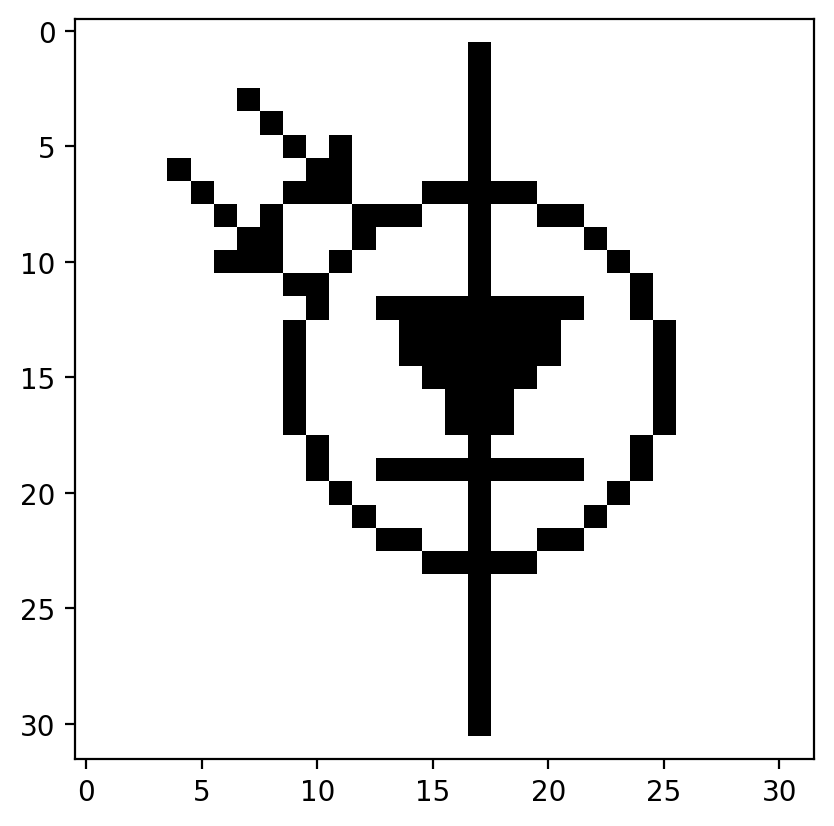

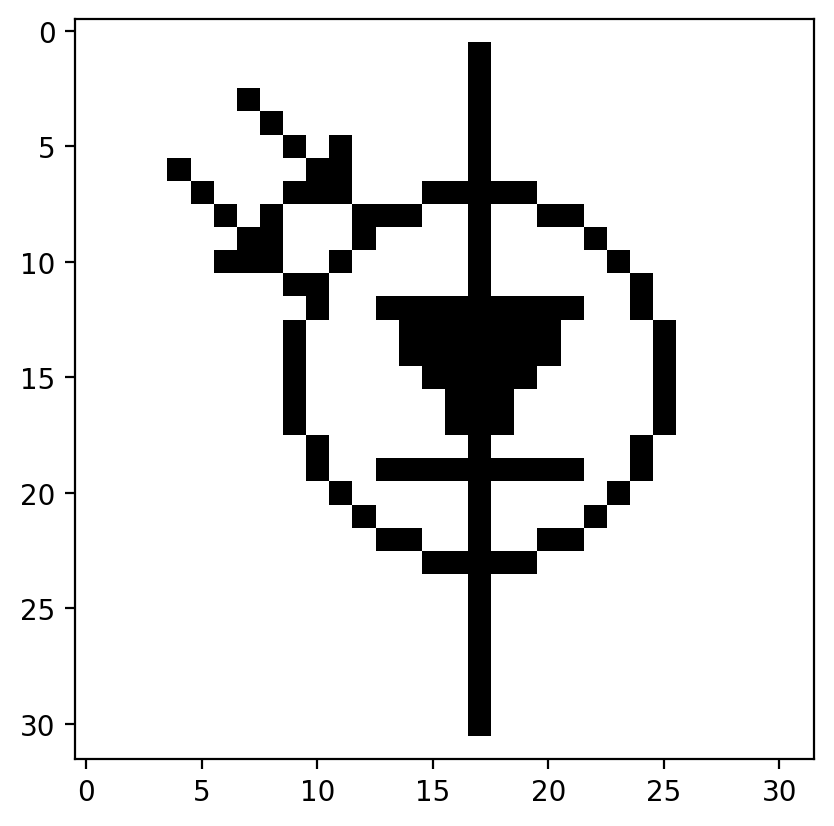

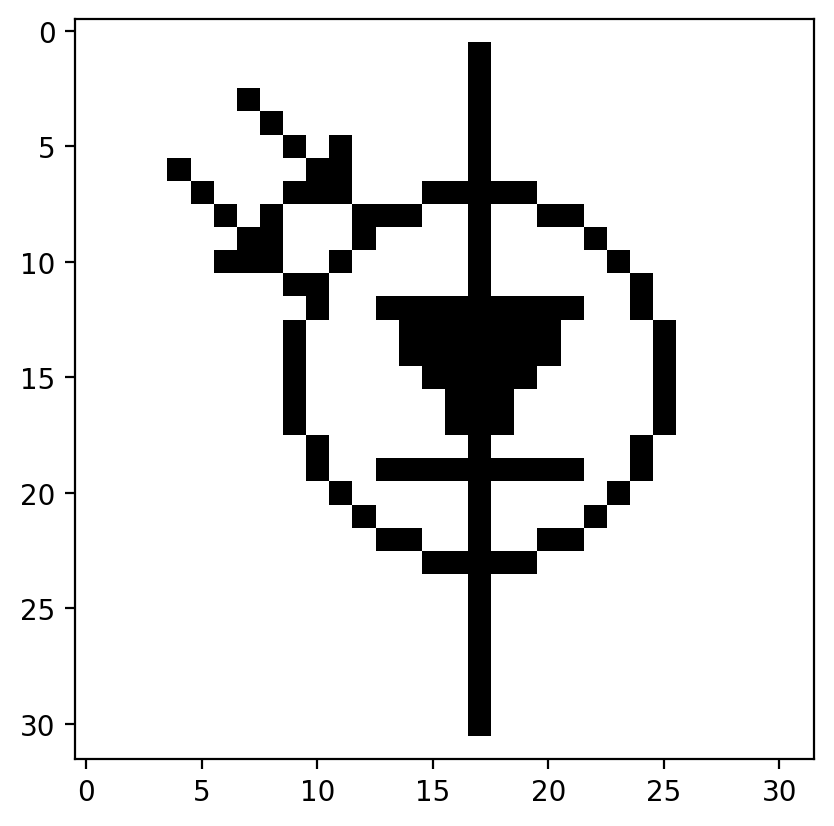

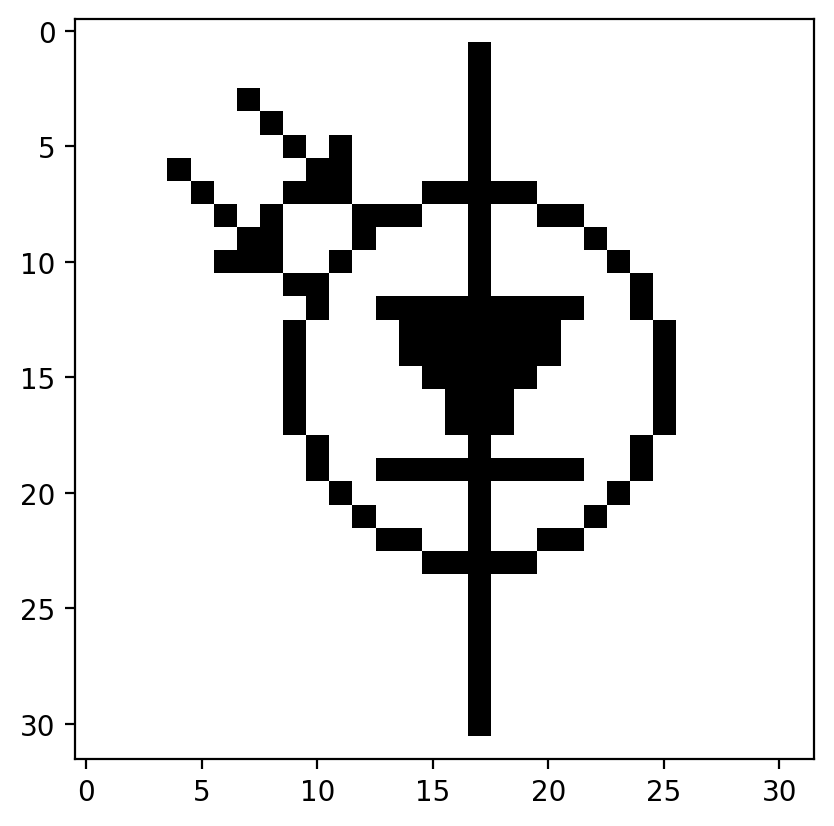

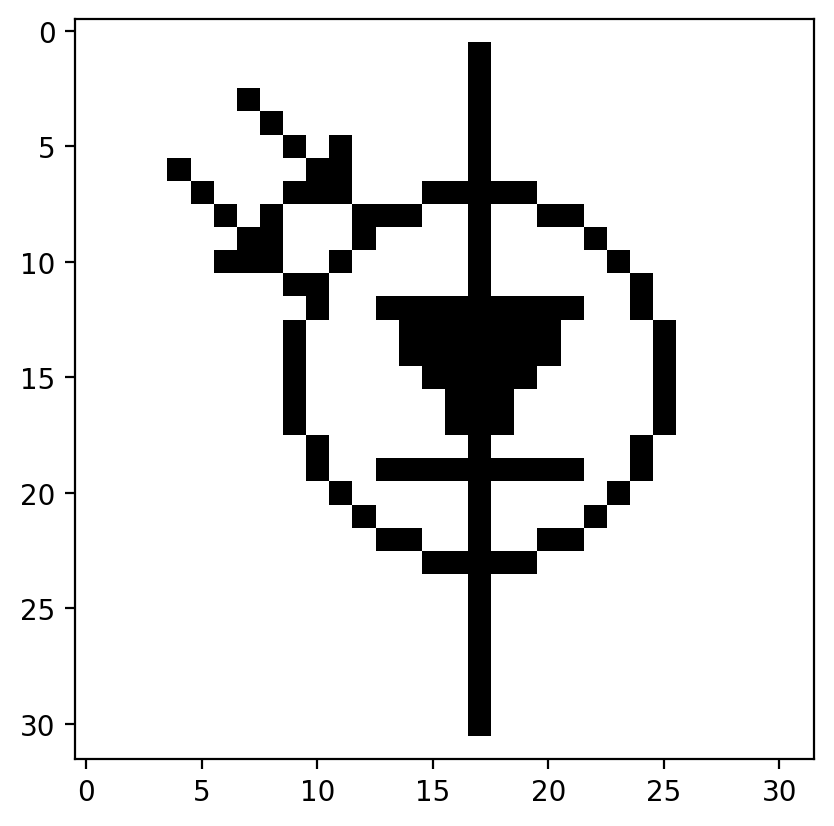

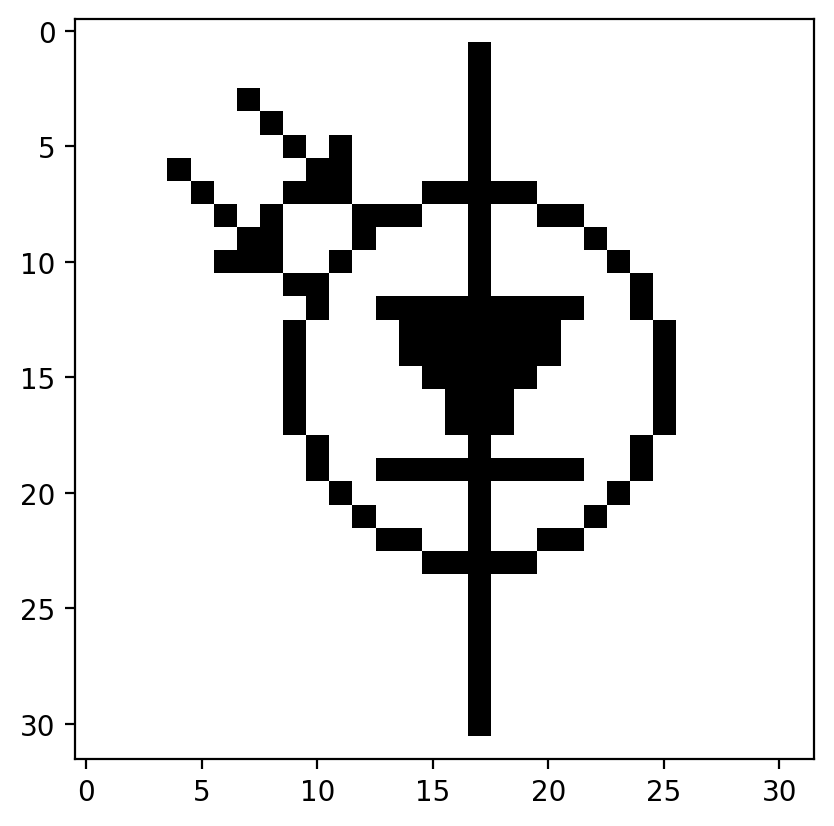

3


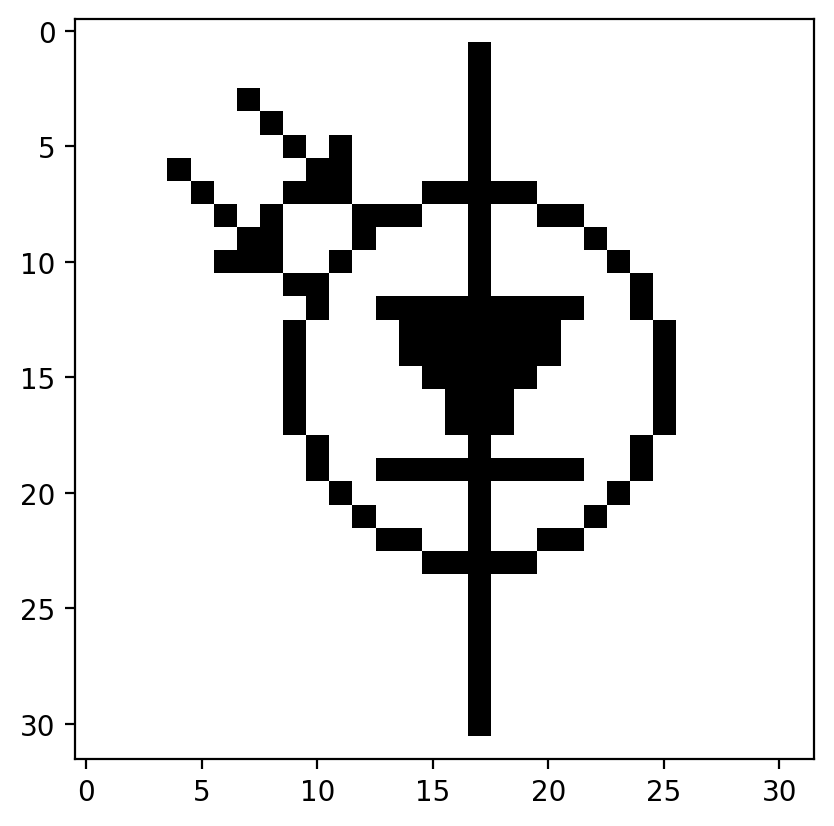

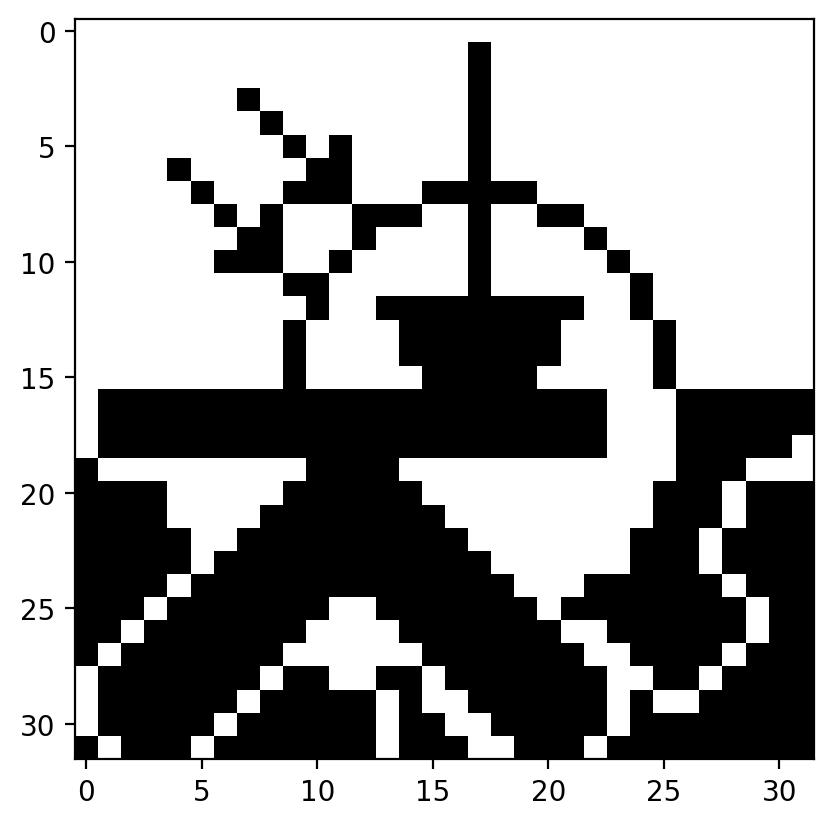

In [117]:

def seqrecall(x,W):
    yold=np.random.rand(x.size)
    ynew=x.copy()
    count=0
    while(not np.array_equal(ynew,yold) and count <10000):  #iterazione fino a convergenza o fino a 1000 se non dovesse convergere
        yold=ynew.copy()
        picture_count=0
        for i in random.sample(range(len(x)),len(x)):   # ATTENZIONE!!!!: RIPETENDO DIVERSE VOLTE SI FINISCE IN DIVERSI ATTRATTORI, TOGLIENDO IL SAMPLING SI FINISCE IN P2 
            ynew[i] = np.sign(np.dot(W[i],ynew))
            if picture_count % 200 == 0:
                showpicture(ynew)
            picture_count+=1
            
        count+=1
    print(count)
    return ynew

showpicture(seqrecall(p11,W))
showpicture(p11)

Energia p1: -1439.390625
Energia p2: -1365.640625
Energia p3: -1462.25


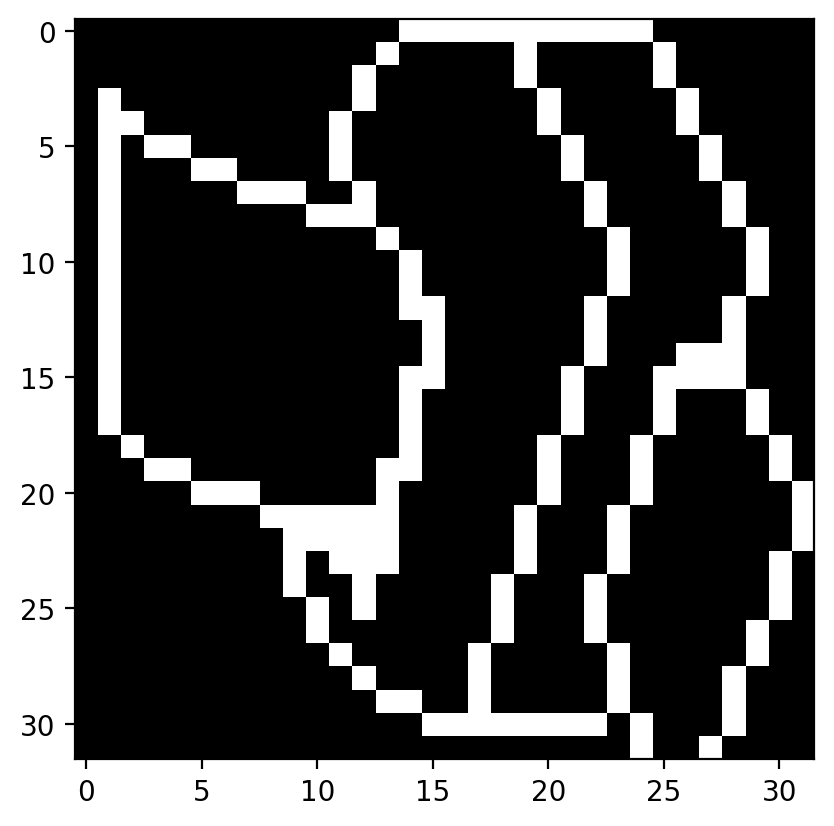

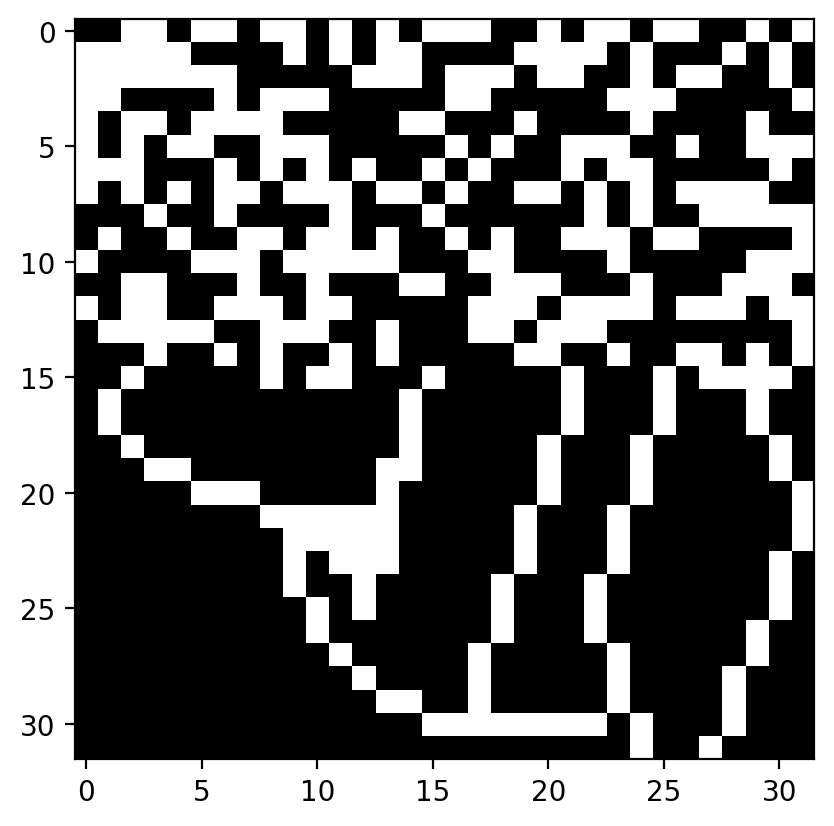

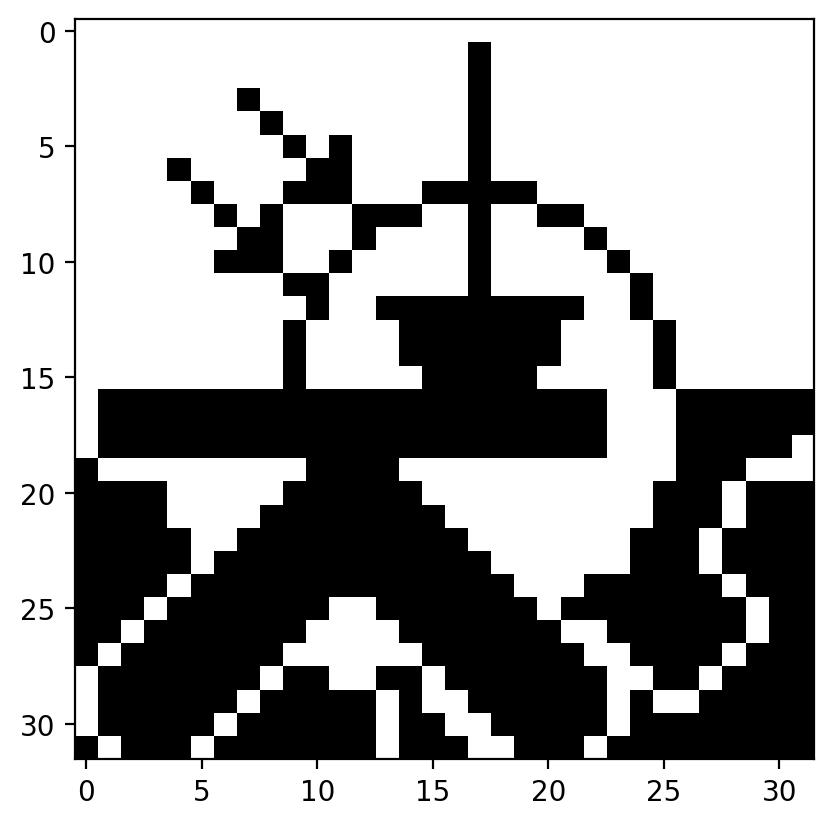


Pattern distorto p10:
 - Energia iniziale: -415.98046875
Convergenza dopo 2 iterazioni
 - Energia finale dopo il richiamo: -1439.390625


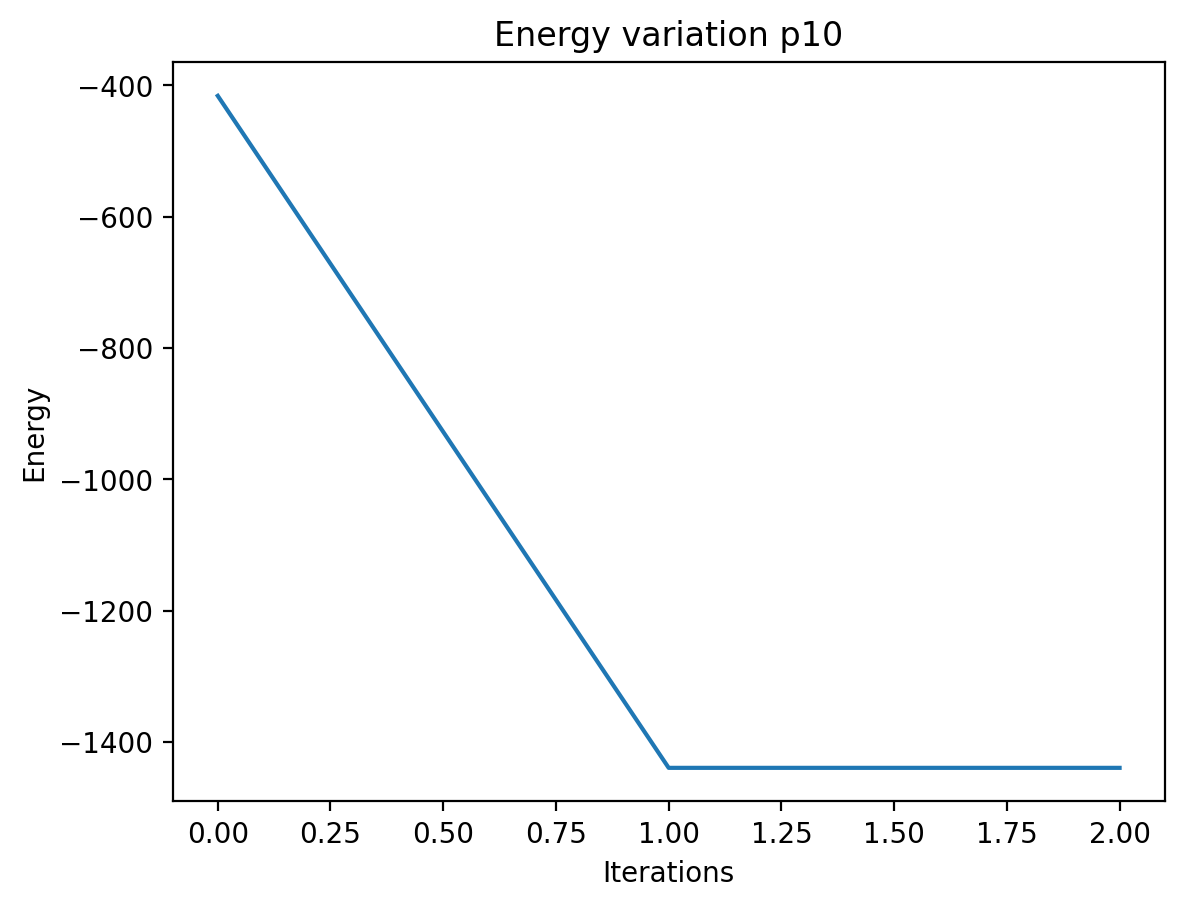


Pattern distorto p11:
 - Energia iniziale: -173.5
Convergenza dopo 3 iterazioni


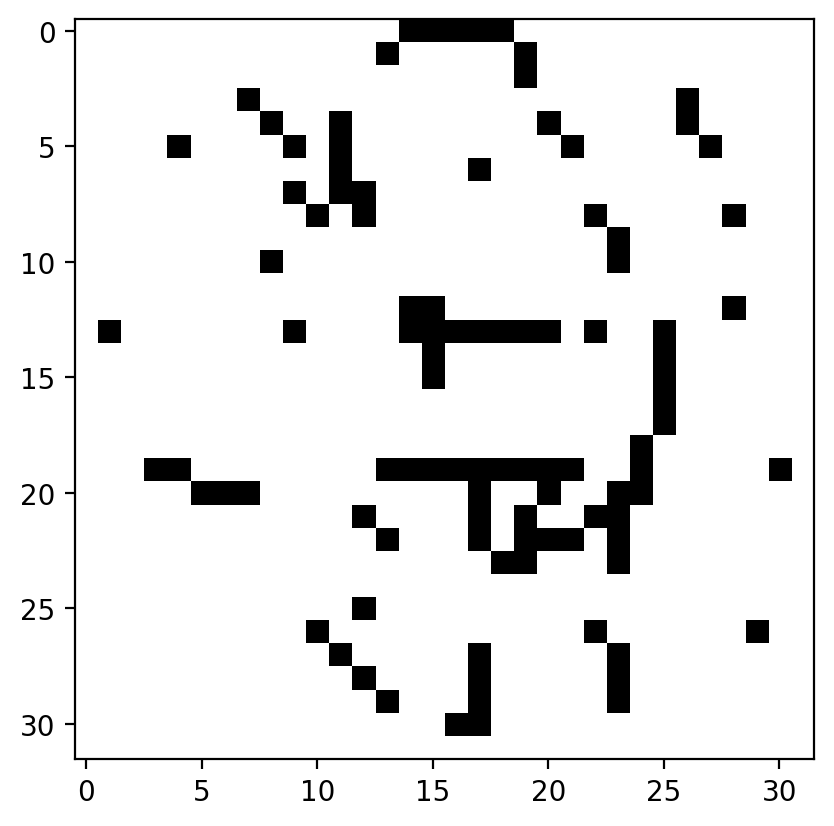

 - Energia finale dopo il richiamo: -1596.01171875


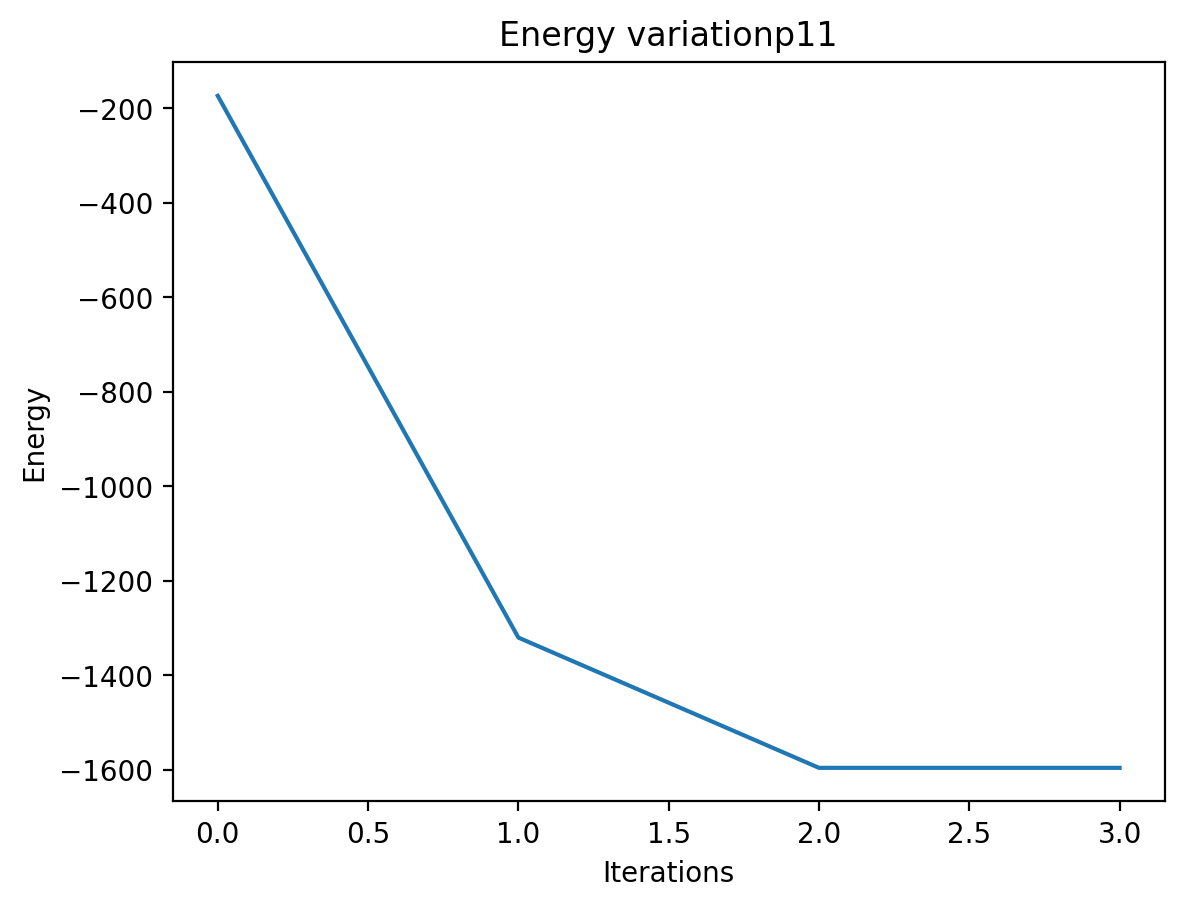

In [118]:
##TASK 3 (1-2-3 )
# Funzione per calcolare l'energia della rete Hopfield
def calculate_energy(x, W):
    return -np.dot(x.T, np.dot(W, x))

energy_p1 = calculate_energy(p1,W)
energy_p2 = calculate_energy(p2,W)
energy_p3 = calculate_energy(p3,W)
print(f"Energia p1: {energy_p1}")
print(f"Energia p2: {energy_p2}")
print(f"Energia p3: {energy_p3}")


# Funzione per richiamare un pattern e monitorare l'energia
def seqrecall_with_energy(x, W):
    yold = np.random.rand(x.size)
    ynew = x.copy()
    count = 0
    energy_list = []  # Lista per tracciare l'energia ad ogni iterazione
    energy = calculate_energy(ynew, W)
    energy_list.append(energy)
    while not np.array_equal(ynew, yold) and count < 10000:  # Iterazione fino a convergenza
        yold = ynew.copy()
        for i in random.sample(range(len(x)), len(x)):  # Aggiornamento sequenziale casuale
            # Calcolo dell'energia
            ynew[i] = np.sign(np.dot(W[i], ynew))
        energy = calculate_energy(ynew, W)
        energy_list.append(energy)
        count += 1
    

    print(f"Convergenza dopo {count} iterazioni")
    return ynew, energy_list

# Funzione per visualizzare l'andamento dell'energia durante il richiamo
def plot_energy(energy_list, title):
    plt.plot(energy_list)
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    plt.title(title)
    plt.show()

# Visualizza il pattern originale e distorto
showpicture(p1)
showpicture(p10)
showpicture(p11)

# Calcola e visualizza l'energia per il pattern distorto p10
print("\nPattern distorto p10:")
initial_energy_p10 = calculate_energy(p10, W)
print(f" - Energia iniziale: {initial_energy_p10}")

recalled_p10, energy_list_p10 = seqrecall_with_energy(p10, W)
final_energy_p10 = calculate_energy(recalled_p10, W)
print(f" - Energia finale dopo il richiamo: {final_energy_p10}")

# Mostra l'andamento dell'energia per p10
plot_energy(energy_list_p10, 'Energy variation p10')

# Calcola e visualizza l'energia per il pattern distorto p11
print("\nPattern distorto p11:")
initial_energy_p11 = calculate_energy(p11, W)
print(f" - Energia iniziale: {initial_energy_p11}")

recalled_p11, energy_list_p11 = seqrecall_with_energy(p11, W)
showpicture(recalled_p11)
final_energy_p11 = calculate_energy(recalled_p11, W)
print(f" - Energia finale dopo il richiamo: {final_energy_p11}")

# Mostra l'andamento dell'energia per p11
plot_energy(energy_list_p11, 'Energy variationp11')

Matrice di pesi casuali (non simmetrica):
[[ 0.          0.21860247  1.07997838 ... -0.47178883 -0.39153712
   0.13862353]
 [ 0.99186553  0.          0.69466043 ...  0.59040713  0.90056348
   0.40761923]
 [ 0.42268463 -0.18791141  0.         ... -0.00976321  0.34160597
   0.98706004]
 ...
 [-0.07100705  0.89613131 -1.17550048 ...  0.         -0.20654381
   0.38177339]
 [ 0.71854889 -0.34868082  0.79262522 ... -0.05554816  0.
   0.74924469]
 [ 0.32006806  1.28509466 -1.06499834 ...  0.42202882  0.8333389
   0.        ]]

Richiamo con matrice casuale non simmetrica:
Convergenza dopo 10000 iterazioni


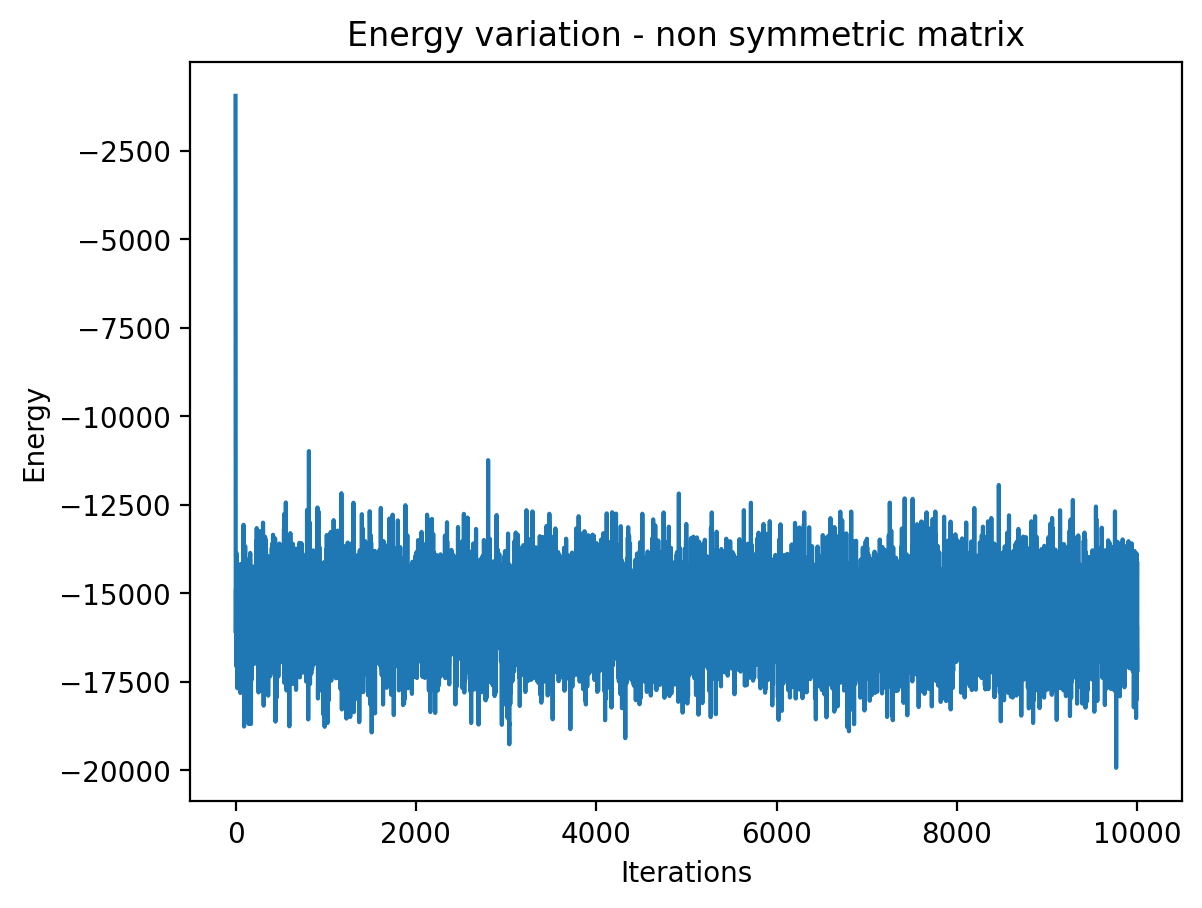

Matrice di pesi simmetrica:
[[ 0.          0.605234    0.7513315  ... -0.27139794  0.16350588
   0.22934579]
 [ 0.605234    0.          0.25337451 ...  0.74326922  0.27594133
   0.84635694]
 [ 0.7513315   0.25337451  0.         ... -0.59263185  0.5671156
  -0.03896915]
 ...
 [-0.27139794  0.74326922 -0.59263185 ...  0.         -0.13104599
   0.40190111]
 [ 0.16350588  0.27594133  0.5671156  ... -0.13104599  0.
   0.79129179]
 [ 0.22934579  0.84635694 -0.03896915 ...  0.40190111  0.79129179
   0.        ]]

Richiamo con matrice simmetrica:
Convergenza dopo 23 iterazioni


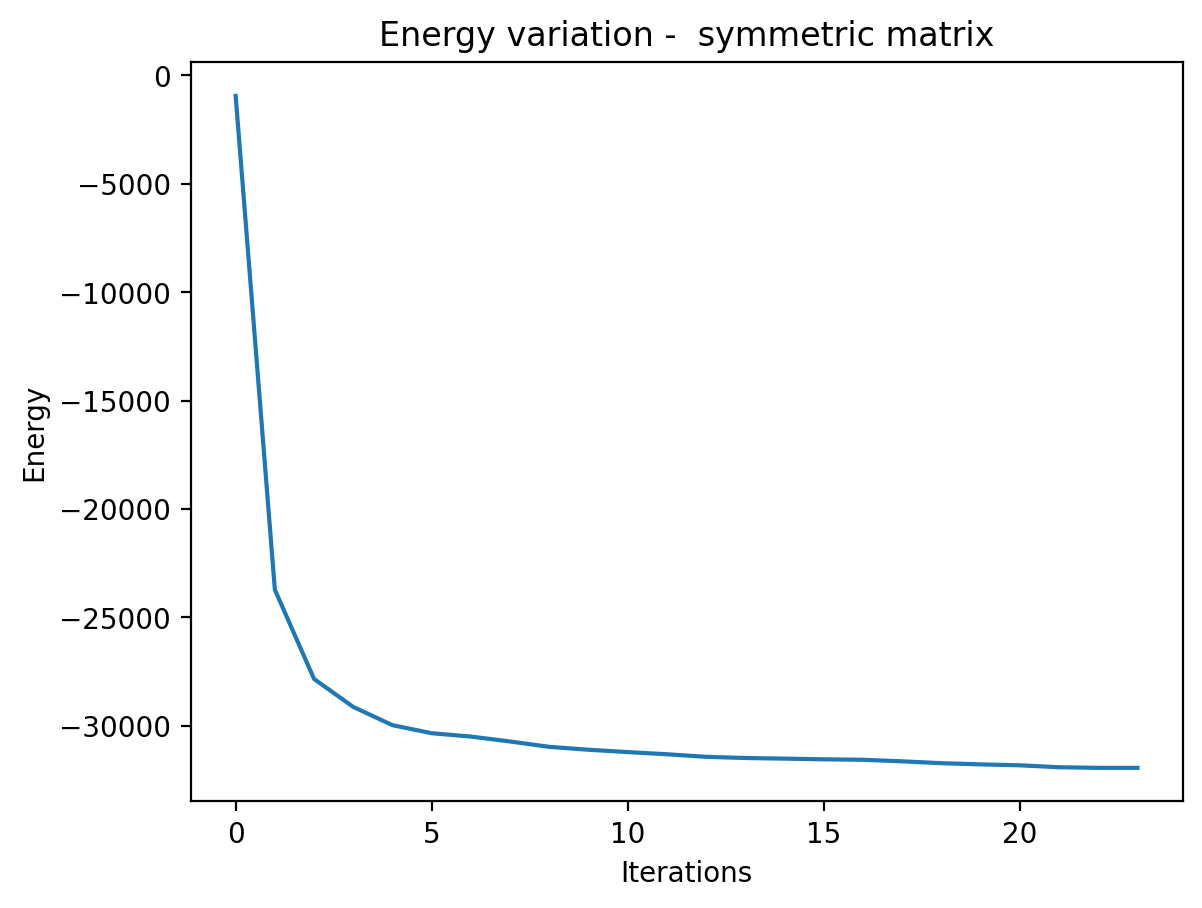

In [119]:
#TASK 3 4-5 

# Funzione per generare una matrice di pesi casuali
def generate_random_weight_matrix(size):
    W_random = np.random.randn(size, size)  # Genera numeri casuali con distribuzione normale
    np.fill_diagonal(W_random, 0)  # Rimuove i self-connection (diagonale)
    return W_random

# Funzione per rendere una matrice simmetrica
def make_symmetric(W):
    return 0.5 * (W + W.T)  # Trasforma la matrice in simmetrica

# Test con matrice di pesi casuali e stato iniziale arbitrario
def test_random_weights(size):
    W_random = generate_random_weight_matrix(size) ## NON CONVERGE
    print("Matrice di pesi casuali (non simmetrica):")
    print(W_random)

    # Stato iniziale arbitrario (random pattern)
    x_init = np.random.choice([-1, 1], size)

    # Richiamo con la matrice casuale non simmetrica
    #in una rete con matrice di pesi non simmetrica, non esiste una funzione di energia che garantisca una diminuzione costante verso
    # un attrattore. Questo porta a un comportamento caotico, in cui la rete può continuare a variare indefinitamente tra diversi stati,
    #  senza mai stabilizzarsi completamente.
    print("\nRichiamo con matrice casuale non simmetrica:")
    recalled_x, energy_list_random = seqrecall_with_energy(x_init, W_random)
    plot_energy(energy_list_random, 'Energy variation - non symmetric matrix')

    # Rendi la matrice simmetrica
    W_symmetric = make_symmetric(W_random)
    print("Matrice di pesi simmetrica:")
    print(W_symmetric)

    # Richiamo con la matrice simmetrica
    print("\nRichiamo con matrice simmetrica:")
    recalled_x_sym, energy_list_symmetric = seqrecall_with_energy(x_init, W_symmetric)
    plot_energy(energy_list_symmetric, 'Energy variation -  symmetric matrix')

# Esegui il test con matrice di pesi casuali
test_random_weights(1024)  # Per esempio, una matrice di 1024 neuroni


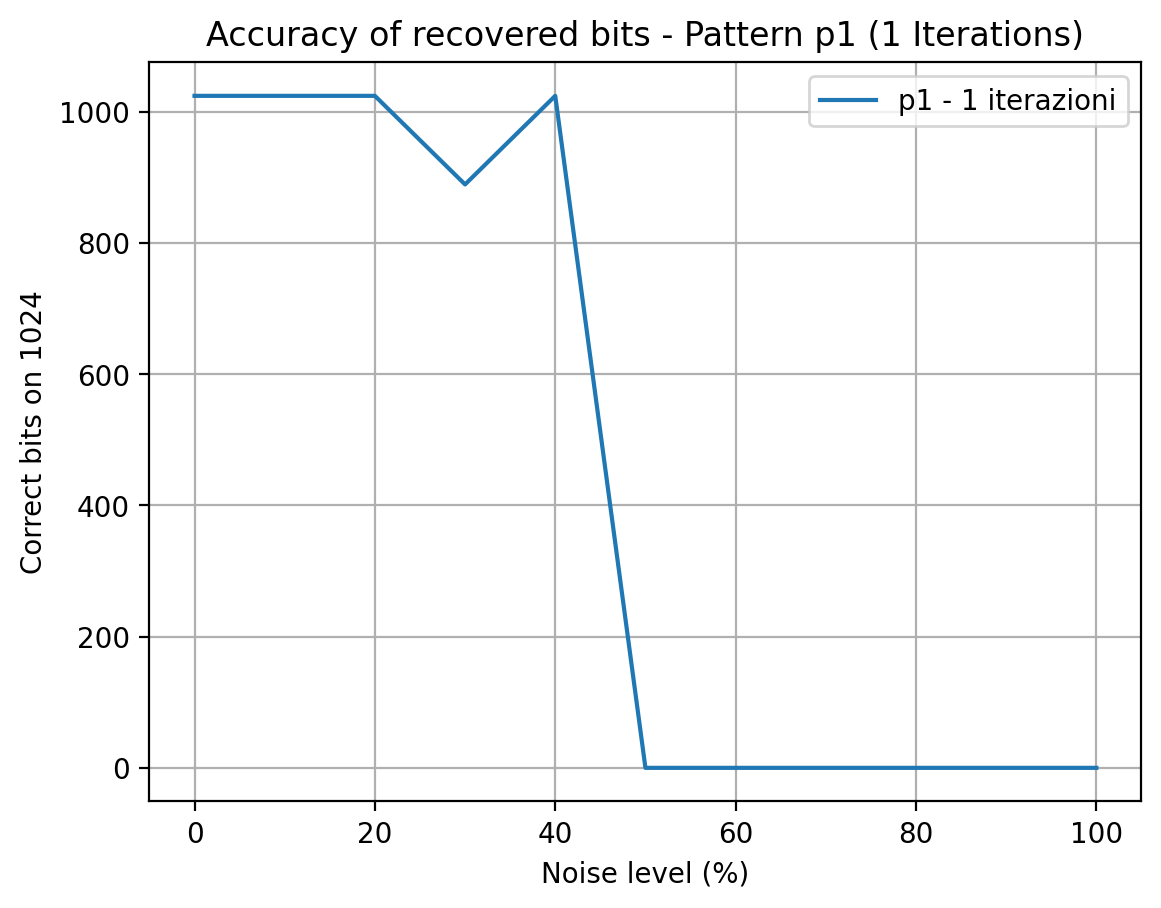

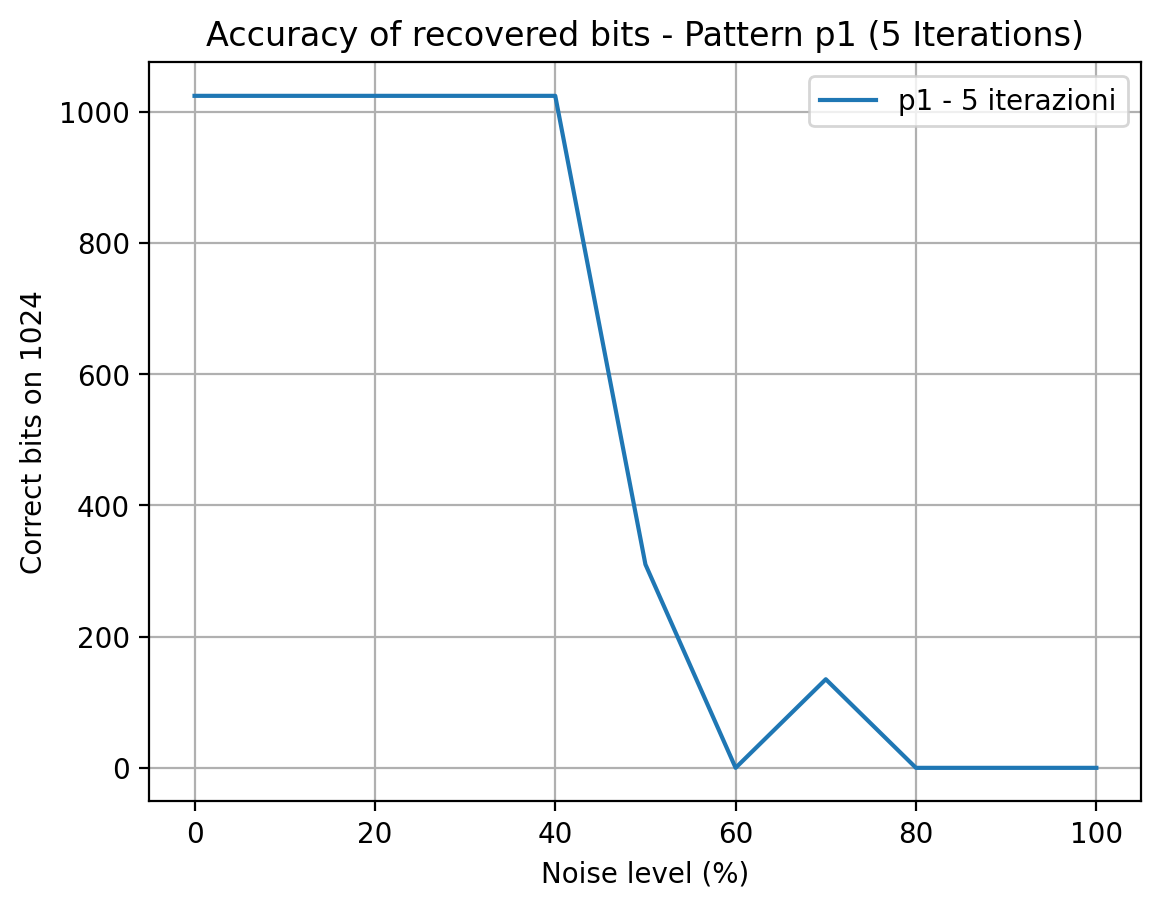

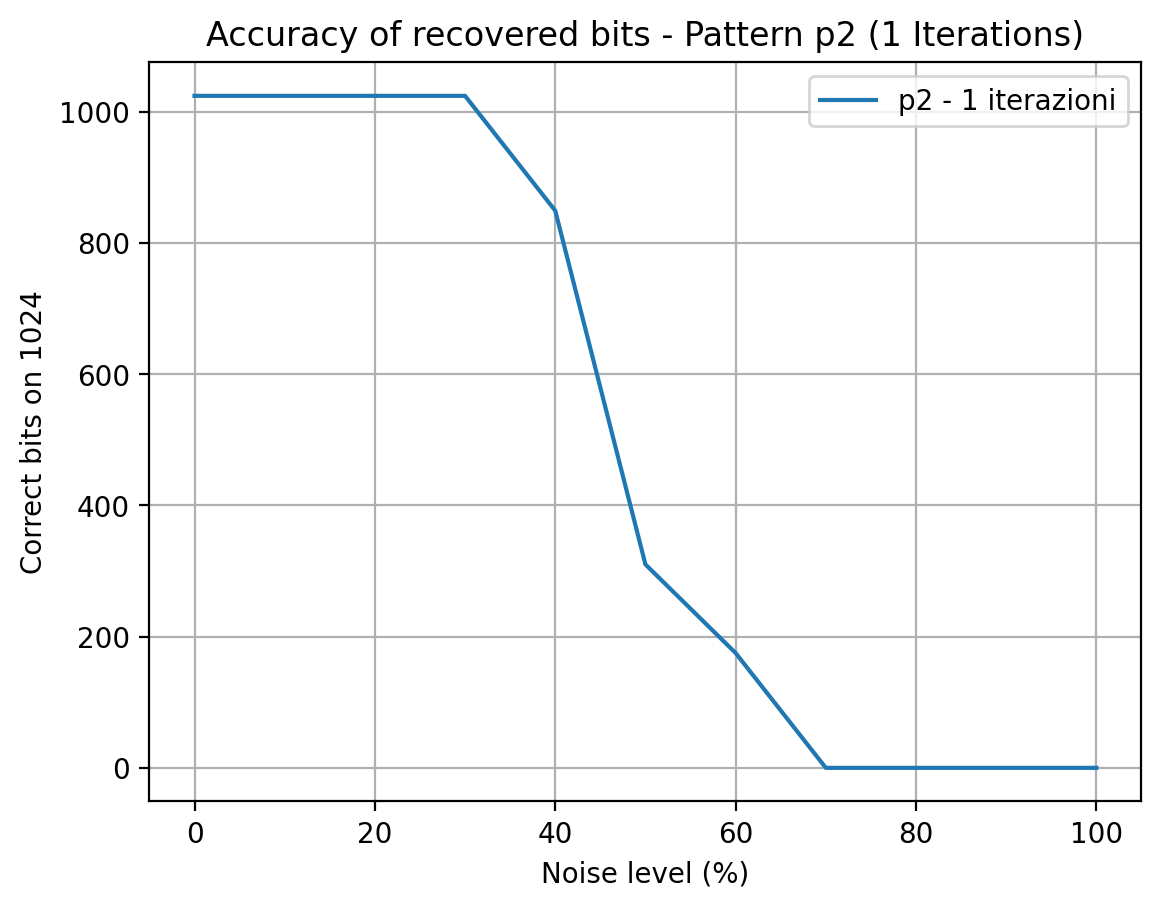

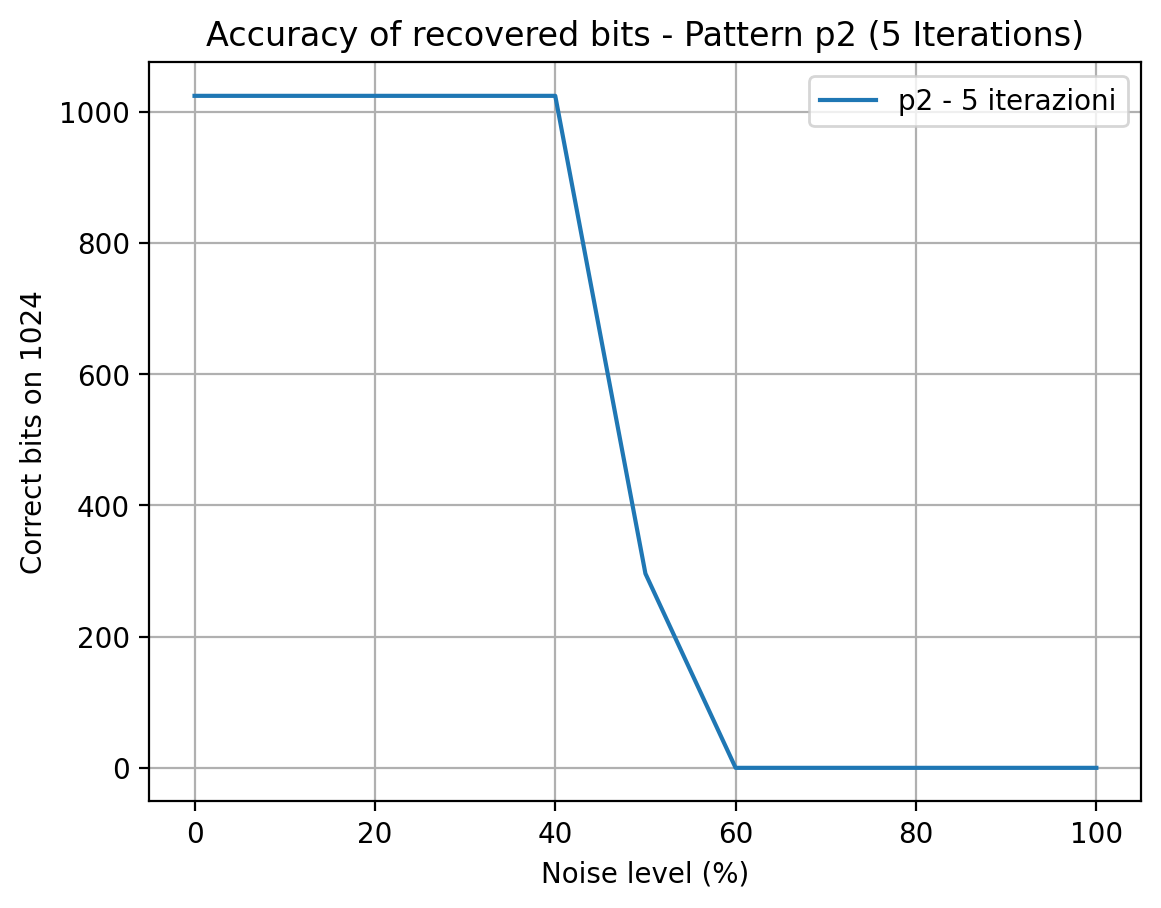

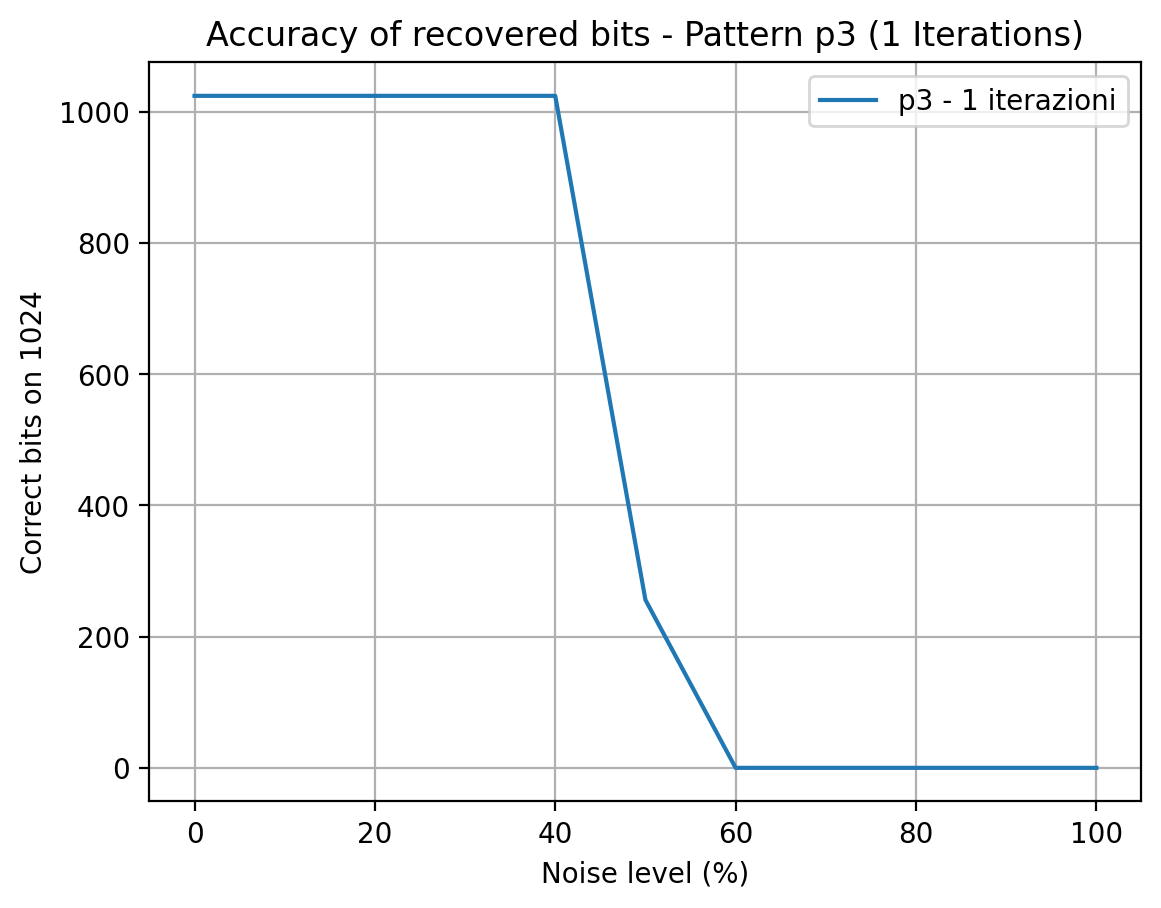

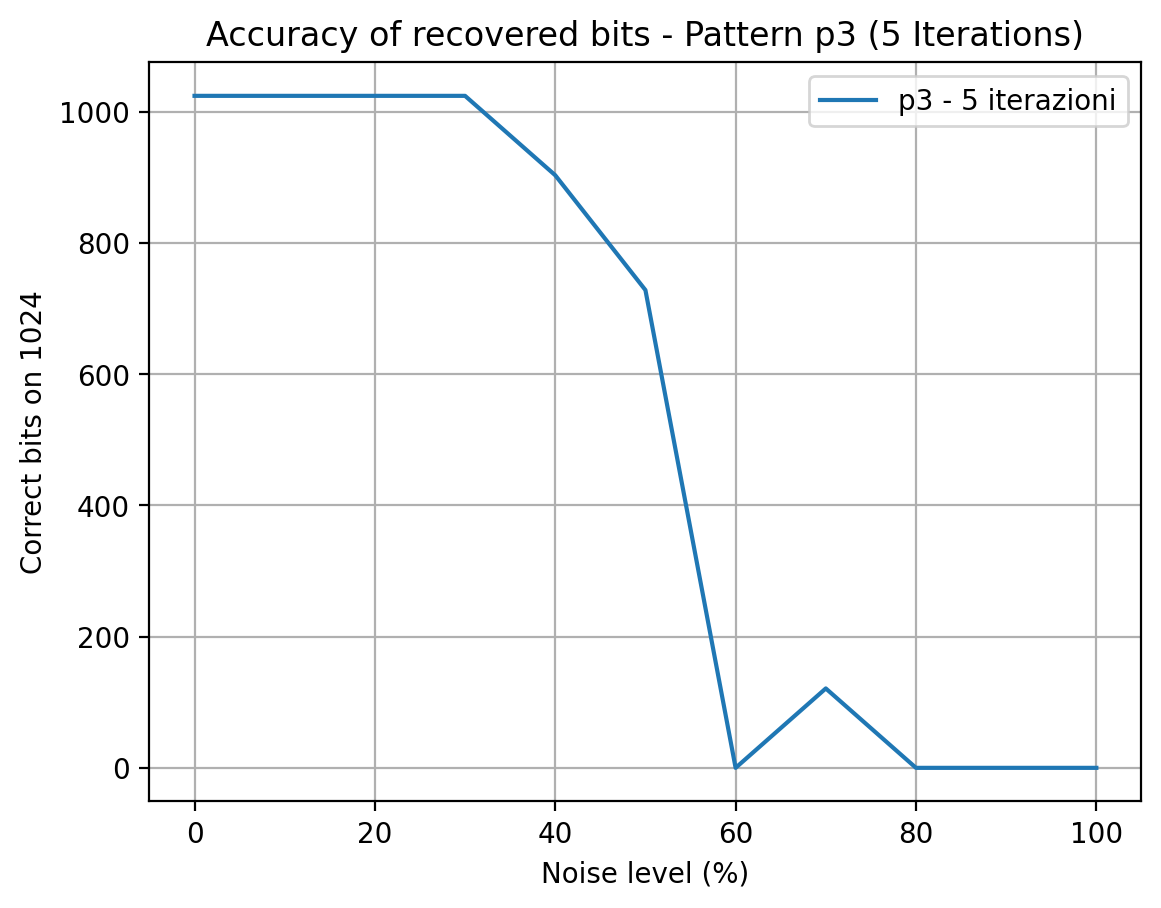

In [120]:
# Funzione per aggiungere rumore a un pattern (flipping random bits)
def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    flip_indices = np.random.choice(len(pattern), size=int(noise_level * len(pattern)), replace=False)
    noisy_pattern[flip_indices] = -noisy_pattern[flip_indices]  # Flippa i bit selezionati
    return noisy_pattern

# Funzione per l'aggiornamento sincrono (Modello di Little)
def little_model_update(x, W, iterations=10):
    for _ in range(iterations):
        x = np.sign(np.dot(W, x))
    return x

# Funzione per testare la resistenza al rumore e calcolare l'accuratezza (numero di bit corretti)
def test_noise_resistance_bits(W, pattern, noise_levels, iterations=1):
    bit_accuracy_list = []

    for noise_level in noise_levels:
        noisy_pattern = add_noise(pattern, noise_level)  # Aggiungi rumore al pattern
        restored_pattern = little_model_update(noisy_pattern, W, iterations)  # Richiama il pattern
        
        # Calcola quanti bit sono corretti dopo il recupero
        correct_bits = np.sum(restored_pattern == pattern)
        bit_accuracy_list.append(correct_bits)
    
    return bit_accuracy_list

# Funzione per tracciare i risultati (accuratezza in termini di bit corretti)
def plot_bit_accuracy(noise_levels, bit_accuracy_list, pattern_name, iterations, pattern_length):
    plt.plot(noise_levels, bit_accuracy_list, label=f"{pattern_name} - {iterations} iterazioni")
    plt.xlabel('Noise level (%)')
    plt.ylabel(f'Correct bits on {pattern_length}')
    plt.title(f'Accuracy of recovered bits - Pattern {pattern_name} ({iterations} Iterations)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Livelli di rumore da 0% a 100% (in passi di 10%)
noise_levels = np.linspace(0, 1, 11)  # 0%, 10%, 20%, ..., 100%

# Lunghezza del pattern
pattern_length = len(p1)

# Testa la resistenza al rumore con un singolo passo e con 10 iterazioni

# Test per p1 - 1 iterazione
bit_accuracy_p1_single_step = test_noise_resistance_bits(W, p1, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p1_single_step, 'p1', 1, pattern_length)

# Test per p1 - 10 iterazioni
bit_accuracy_p1_multiple_steps = test_noise_resistance_bits(W, p1, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p1_multiple_steps, 'p1', 5, pattern_length)

# Puoi ripetere lo stesso processo per p2 e p3:

# Test per p2 - 1 iterazione
bit_accuracy_p2_single_step = test_noise_resistance_bits(W, p2, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p2_single_step, 'p2', 1, pattern_length)

# Test per p2 - 10 iterazioni
bit_accuracy_p2_multiple_steps = test_noise_resistance_bits(W, p2, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p2_multiple_steps, 'p2', 5, pattern_length)

# Test per p3 - 1 iterazione
bit_accuracy_p3_single_step = test_noise_resistance_bits(W, p3, noise_levels, iterations=1)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p3_single_step, 'p3', 1, pattern_length)

# Test per p3 - 10 iterazioni
bit_accuracy_p3_multiple_steps = test_noise_resistance_bits(W, p3, noise_levels, iterations=10)
plot_bit_accuracy(noise_levels * 100, bit_accuracy_p3_multiple_steps, 'p3', 5, pattern_length)


In [121]:
#Task 5 1-2-3
def add_pattern(x,W):  #add a single pattern to an already existing network
    N=len(x)
    for i in range(N):
            for j in range(N):
                W[i,j]+=x[i]*x[j]/N
    return W
patterns=np.array([p1,p2,p3,p4])
W=hebbiantraining(patterns)
noisy_p1=add_noise(p1,0.2)
noisy_p2=add_noise(p2,0.2)
noisy_p3=add_noise(p3,0.2)
noisy_p4=add_noise(p4,0.2)
noisy_p5=add_noise(p5,0.2)
noisy_p6=add_noise(p6,0.2)
noisy_p7=add_noise(p7,0.2)

def recalled_patterns(patterns,noisy_patterns,W,max_iterations=1000):
     N=len(patterns[:,0])
     count=0
     for i in range(N):
          if np.array_equal(recall(noisy_patterns[i],W,max_iterations),patterns[i]):
             count+=1
     return count 

noisy_patterns=np.array([noisy_p1,noisy_p2,noisy_p3,noisy_p4])
print(f"The network remembers {recalled_patterns(patterns,noisy_patterns,W)} picture patterns") # just adding p4 makes the network forget everything!!!!

#Now we try with random patterns
rpatterns= np.sign(np.random.randn(300,1024))
noisy_patterns=[]
for i in range(300):
     noisy_patterns.append(add_noise(rpatterns[i],0.2))
W=hebbiantraining(rpatterns[0:60])
print(f"The network remembers {recalled_patterns(rpatterns[0:60],rpatterns[0:60],W)} random patterns") # up to 60 random patterns can be stored and the decay is not abrupt

#Probably the cause is bigger CROSSTALK in picture than in random patterns

The network remembers 0 picture patterns
The network remembers 60 random patterns


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

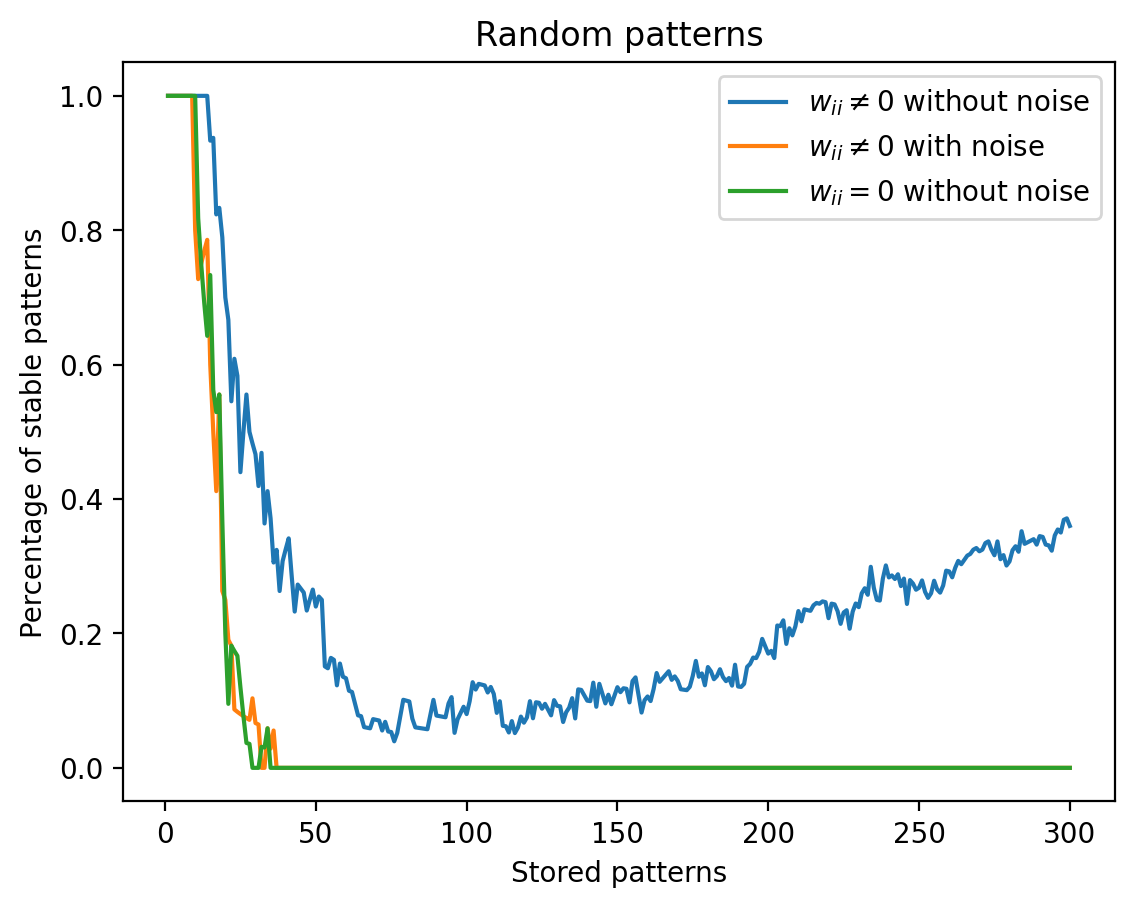

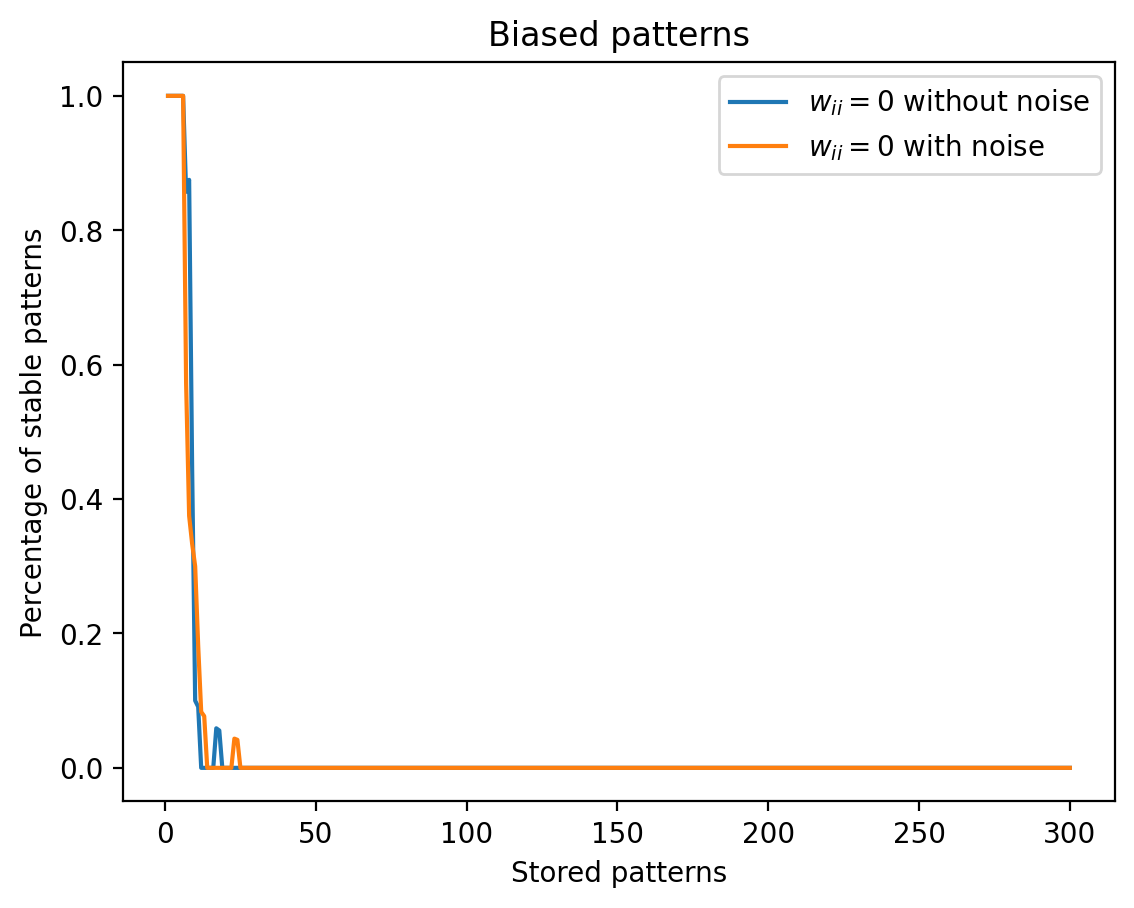

In [154]:
#Task 5 4-5-6-7
np.random.seed(21)
patterns= np.sign(np.random.randn(300,100))
noisy_patterns=[]
for i in range(300):
     noisy_patterns.append(add_noise(patterns[i],0.1))
W=np.zeros((100,100))
stable_patterns=[]
for i in range(300):
    W=add_pattern(patterns[i],W)
    stable_patterns.append(recalled_patterns(patterns[0:i+1],patterns[0:i+1],W,1)/(i+1))
patterns_number=np.array(range(300))+1
print(patterns_number)
print(stable_patterns)
plt.plot(patterns_number,np.array(stable_patterns),label=r'$w_{ii} \neq 0$ without noise')
plt.title("Random patterns")
plt.xlabel("Stored patterns")
plt.ylabel("Percentage of stable patterns")
W=np.zeros((100,100))
stable_patterns=[]
for i in range(300):
    W=add_pattern(patterns[i],W)
    stable_patterns.append(recalled_patterns(patterns[0:i+1],noisy_patterns[0:i+1],W,1)/(i+1))
plt.plot(patterns_number,np.array(stable_patterns),label=r'$w_{ii} \neq 0$ with noise')
W=np.zeros((100,100))
stable_patterns=[]
for i in range(300):
    W=add_pattern(patterns[i],W)
    np.fill_diagonal(W,0)
    stable_patterns.append(recalled_patterns(patterns[0:i+1],patterns[0:i+1],W,1)/(i+1))
plt.plot(patterns_number,np.array(stable_patterns),label=r'$w_{ii} = 0$ without noise')
plt.xlabel("Stored patterns")
plt.ylabel("Percentage of stable patterns")
plt.legend()
print(stable_patterns) #At most 10 pattern get recovered

biased_patterns=np.sign(0.5+np.random.randn(300,100))

noisy_patterns=[]
for i in range(300):
     noisy_patterns.append(add_noise(biased_patterns[i],0.1))
W=np.zeros((100,100))
stable_patterns=[]
for i in range(300):
    W=add_pattern(biased_patterns[i],W)
    np.fill_diagonal(W,0)
    stable_patterns.append(recalled_patterns(biased_patterns[0:i+1],biased_patterns[0:i+1],W,1)/(i+1))
patterns_number=np.array(range(300))+1
print(patterns_number)
print(stable_patterns)
plt.figure()
plt.plot(patterns_number,np.array(stable_patterns),label=r'$w_{ii} = 0$ without noise')
plt.title("Biased patterns")
plt.xlabel("Stored patterns")
plt.ylabel("Percentage of stable patterns")
W=np.zeros((100,100))
stable_patterns=[]
for i in range(300):
    W=add_pattern(biased_patterns[i],W)
    np.fill_diagonal(W,0)
    stable_patterns.append(recalled_patterns(biased_patterns[0:i+1],noisy_patterns[0:i+1],W,1)/(i+1))
plt.plot(patterns_number,np.array(stable_patterns),label=r'$w_{ii} = 0$ with noise')
plt.legend()

In [203]:
import numpy as np

# Funzione per generare pattern sparsi
def generate_sparse_patterns(n_neurons, n_patterns, activity_ratio):
    patterns = np.zeros((n_patterns, n_neurons))
    for i in range(n_patterns):
        active_neurons = np.random.choice(n_neurons, int(activity_ratio * n_neurons), replace=False)
        patterns[i, active_neurons] = 1
    return patterns

# Funzione per calcolare i pesi con la regola modificata
def calculate_weights(patterns, rho):
    n_neurons = patterns.shape[1]
    weights = np.zeros((n_neurons, n_neurons))
    for pattern in patterns:
        weights += np.outer(pattern - rho, pattern - rho)
    np.fill_diagonal(weights, 0)  # Evita auto-connessioni
    return weights

# Funzione per aggiornare iterativamente gli stati dei neuroni
def update_neuron_state(weights, pattern, theta):
    n_neurons = len(pattern)
    updated_pattern = np.zeros(n_neurons)
    for i in range(n_neurons):
        input_sum = np.dot(weights[i], pattern)
        updated_pattern[i] = 0.5 + 0.5 * np.sign(input_sum - theta)
    return updated_pattern

# Funzione per testare lo storage e stampare quanti pattern vengono recuperati
def test_storage(patterns, theta_values, rho):
    weights = calculate_weights(patterns, rho)  # Calcola i pesi una sola volta
    for theta in theta_values:
        recovered_count = 0
        for pattern in patterns:
            updated_pattern = update_neuron_state(weights, pattern, theta)
            if np.array_equal(pattern, updated_pattern):
                recovered_count += 1
        print(f'Theta = {theta}, Recovered patterns = {recovered_count} out of {len(patterns)}')

# Parametri
n_neurons = 100  # Numero di neuroni
n_patterns = 10  # Numero di pattern da memorizzare
rho_values = [0.1, 0.05, 0.01]  # Livelli di attività media
theta_values = np.linspace(0, 1, 10)  # Prova diversi valori di theta

# Genera pattern con diverse attività
sparse_patterns_5 = generate_sparse_patterns(n_neurons, n_patterns, activity_ratio=0.05)
sparse_patterns_1 = generate_sparse_patterns(n_neurons, n_patterns, activity_ratio=0.01)
sparse_patterns_01 = generate_sparse_patterns(n_neurons, n_patterns, activity_ratio=0.1)


# Testa lo storage per diversi livelli di attività

print("\nTesting with 1% activity (ρ = 0.1):")
test_storage(sparse_patterns_01, theta_values, rho=0.1)

print("Testing with 5% activity (ρ = 0.05):")
test_storage(sparse_patterns_5, theta_values, rho=0.05)

print("\nTesting with 1% activity (ρ = 0.01):")
test_storage(sparse_patterns_1, theta_values, rho=0.01)



Testing with 1% activity (ρ = 0.1):
Theta = 0.0, Recovered patterns = 0 out of 10
Theta = 0.1111111111111111, Recovered patterns = 0 out of 10
Theta = 0.2222222222222222, Recovered patterns = 0 out of 10
Theta = 0.3333333333333333, Recovered patterns = 0 out of 10
Theta = 0.4444444444444444, Recovered patterns = 0 out of 10
Theta = 0.5555555555555556, Recovered patterns = 0 out of 10
Theta = 0.6666666666666666, Recovered patterns = 0 out of 10
Theta = 0.7777777777777777, Recovered patterns = 0 out of 10
Theta = 0.8888888888888888, Recovered patterns = 0 out of 10
Theta = 1.0, Recovered patterns = 0 out of 10
Testing with 5% activity (ρ = 0.05):
Theta = 0.0, Recovered patterns = 2 out of 10
Theta = 0.1111111111111111, Recovered patterns = 2 out of 10
Theta = 0.2222222222222222, Recovered patterns = 2 out of 10
Theta = 0.3333333333333333, Recovered patterns = 2 out of 10
Theta = 0.4444444444444444, Recovered patterns = 2 out of 10
Theta = 0.5555555555555556, Recovered patterns = 3 out o